In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
train.head()

,Unnamed: 0,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,b_rating,tag,a_rating,aaa_rating,aa_rating,...,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_category,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,0,0.0,0.0,0.0,0.0,0.0,134783,0.0,0.0,0.0,...,15.35,0.86,0.01,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
1,1,0.0,0.0,0.0,0.0,0.0,61271,0.0,0.0,0.0,...,15.35,0.86,0.01,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
2,2,0.0,0.0,0.0,0.0,0.0,64412,0.0,0.0,0.0,...,10.01,0.86,0.01,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
3,3,0.0,0.0,0.0,0.0,0.0,184058,0.0,0.0,0.0,...,9.13,0.96,0.01,0.01,0.04,0.00,-0.01,0.01,0.09,5.95
4,4,0.0,0.0,0.0,0.0,0.0,249560,0.0,0.0,0.0,...,10.21,0.79,0.01,0.01,0.04,5.65,-0.00,0.01,0.09,5.89


In [2]:
train.columns

Index(['Unnamed: 0', 'bb_rating', 'us_govt_bond_rating', 'below_b_rating',
       'others_rating', 'b_rating', 'tag', 'a_rating', 'aaa_rating',
       'aa_rating', 'bbb_rating', 'portfolio_communication_allocation',
       'portfolio_financial_services', 'portfolio_industrials_allocation',
       'portfolio_tech_allocation', 'portfolio_materials_basic_allocation',
       'portfolio_energy_allocation', 'portfolio_consumer_defence_allocation',
       'portfolio_healthcare_allocation', 'portfolio_property_allocation',
       'id', 'portfolio_utils_allocation',
       'portfolio_cyclical_consumer_allocation', 'category', 'fund_id',
       'investment_class', 'currency', 'total_assets', 'yield',
       'greatstone_rating', 'inception_date', 'fund_size', 'return_ytd',
       'fund_ratio_net_annual_expense', 'pb_ratio', 'ps_ratio', 'mmc',
       'pc_ratio', 'pe_ratio', 'years_up', '2018_return_category',
       'category_return_1year', 'cash_percent_of_portfolio', 'ytd_return_fund',
       'y

In [7]:
train['Unnamed: 0'].head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64

In [4]:
train.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
train['bb_rating'].describe()

count    19905.000000
mean         3.444471
std          8.223525
min          0.000000
25%          0.000000
50%          0.000000
75%          2.430000
max         80.470000
Name: bb_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7192e+04, 1.3620e+03, 4.8400e+02, 3.9700e+02, 2.4500e+02,
        1.4700e+02, 5.9000e+01, 1.1000e+01, 7.0000e+00, 1.0000e+00]),
 array([ 0.   ,  8.047, 16.094, 24.141, 32.188, 40.235, 48.282, 56.329,
        64.376, 72.423, 80.47 ]),
 <a list of 10 Patch objects>)

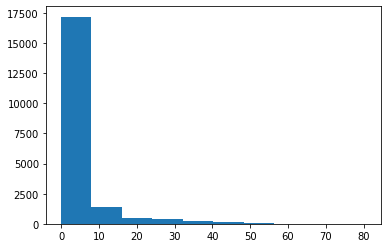

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(train['bb_rating'])

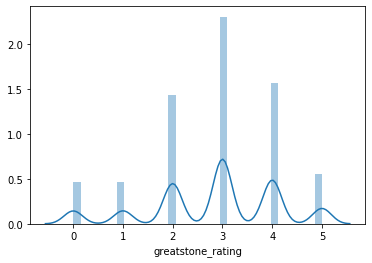

In [18]:
sns.distplot(train['greatstone_rating'])

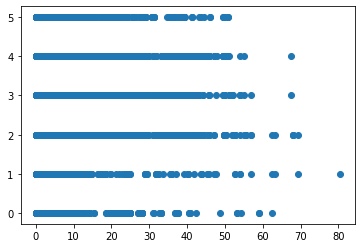

In [20]:
plt.scatter(data=train,x='bb_rating',y='greatstone_rating')

there are zeros in great stone ratings and also bb_ratings, what does they mean? (missing data? or values that are near to zero?)

In [23]:
train['greatstone_rating'].value_counts()

3.0    6786
4.0    4614
2.0    4230
5.0    1629
1.0    1376
0.0    1365
Name: greatstone_rating, dtype: int64

In [257]:
fund_config = pd.read_csv('fund_config.csv')
fund_config.head()

,category,parent_company,fund_id,fund_name
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3


In [260]:
train_1= pd.merge(train,fund_config,how='left',left_on='fund_id',right_on='fund_id')
train_1.drop(columns=['category_y'],inplace=True)

Assumption -1 Great stone rating is not continuous but discrete values (0 to 5) and zero is valid value
Assumption -2 Zero values for bb_ratings are valid values

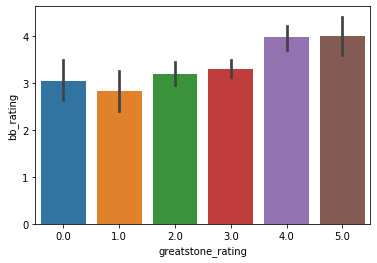

In [239]:
train['greatstone_rating']=train['greatstone_rating'].astype('category')
sns.barplot(x='greatstone_rating',y='bb_rating',data=train)

In [35]:
train['us_govt_bond_rating'].value_counts()

0.0    19905
Name: us_govt_bond_rating, dtype: int64

In [6]:
train.drop(columns=['us_govt_bond_rating'],inplace=True)

In [38]:
train['below_b_rating'].describe()

count    19905.000000
mean         0.823456
std          2.684577
min         -0.020000
25%          0.000000
50%          0.000000
75%          0.110000
max         42.300000
Name: below_b_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.8818e+04, 5.8300e+02, 2.4800e+02, 1.4400e+02, 3.8000e+01,
        4.5000e+01, 1.6000e+01, 1.0000e+00, 6.0000e+00, 6.0000e+00]),
 array([-2.0000e-02,  4.2120e+00,  8.4440e+00,  1.2676e+01,  1.6908e+01,
         2.1140e+01,  2.5372e+01,  2.9604e+01,  3.3836e+01,  3.8068e+01,
         4.2300e+01]),
 <a list of 10 Patch objects>)

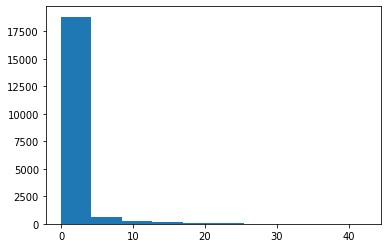

In [40]:
plt.hist(train['below_b_rating'])

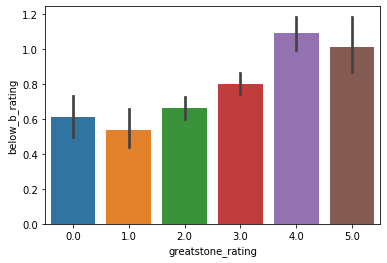

In [41]:
sns.barplot(x='greatstone_rating',y='below_b_rating',data=train)

In [43]:
train['others_rating'].describe()

count    19905.000000
mean         1.694273
std          6.927442
min        -49.550000
25%          0.000000
50%          0.000000
75%          0.340000
max        100.000000
Name: others_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.0000e+00, 3.0000e+00, 3.3000e+01, 1.9116e+04, 4.8600e+02,
        1.2500e+02, 4.2000e+01, 5.1000e+01, 1.8000e+01, 2.7000e+01]),
 array([-49.55 , -34.595, -19.64 ,  -4.685,  10.27 ,  25.225,  40.18 ,
         55.135,  70.09 ,  85.045, 100.   ]),
 <a list of 10 Patch objects>)

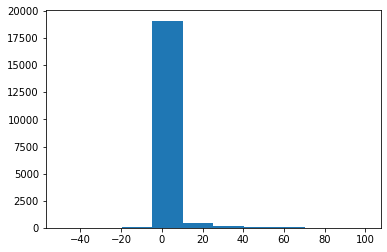

In [46]:
plt.hist(train['others_rating'])

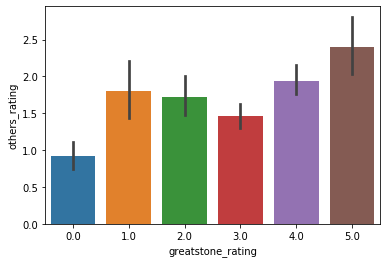

In [47]:
sns.barplot(x='greatstone_rating',y='others_rating',data=train)

In [49]:
train['b_rating'].describe()

count    19905.000000
mean         3.199329
std          9.123296
min         -0.120000
25%          0.000000
50%          0.000000
75%          0.700000
max         80.680000
Name: b_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7724e+04, 9.4700e+02, 3.7300e+02, 1.7900e+02, 2.6300e+02,
        2.3500e+02, 1.3000e+02, 2.4000e+01, 1.8000e+01, 1.2000e+01]),
 array([-0.12,  7.96, 16.04, 24.12, 32.2 , 40.28, 48.36, 56.44, 64.52,
        72.6 , 80.68]),
 <a list of 10 Patch objects>)

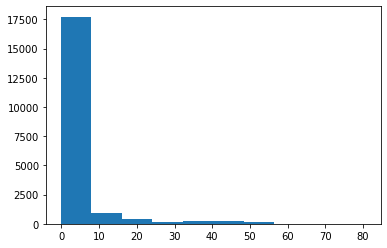

In [50]:
plt.hist(train['b_rating'])

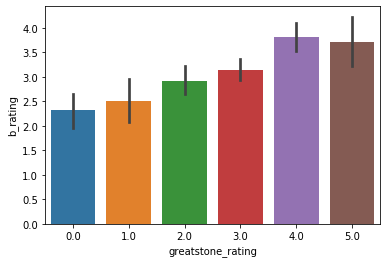

In [51]:
sns.barplot(x='greatstone_rating',y='b_rating',data=train)

In [54]:
train['a_rating'].describe()

count    19905.000000
mean         5.089300
std          9.302361
min          0.000000
25%          0.000000
50%          0.000000
75%          8.390000
max         72.870000
Name: a_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.4555e+04, 2.7270e+03, 1.2390e+03, 6.5000e+02, 4.1800e+02,
        1.8100e+02, 7.6000e+01, 4.6000e+01, 1.0000e+01, 3.0000e+00]),
 array([ 0.   ,  7.287, 14.574, 21.861, 29.148, 36.435, 43.722, 51.009,
        58.296, 65.583, 72.87 ]),
 <a list of 10 Patch objects>)

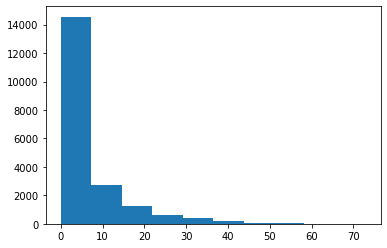

In [55]:
plt.hist(train['a_rating'])

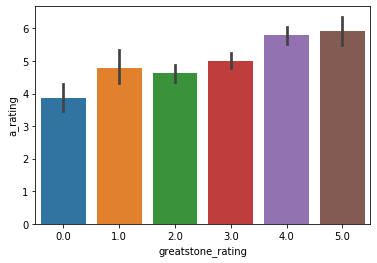

In [57]:
sns.barplot(x='greatstone_rating',y='a_rating',data=train)

In [58]:
train['aaa_rating'].describe()

count    19905.000000
mean        14.501261
std         25.556244
min         -3.150000
25%          0.000000
50%          0.000000
75%         18.360000
max        118.650000
Name: aaa_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.4082e+04, 1.0150e+03, 6.8700e+02, 9.4000e+02, 1.2560e+03,
        7.8700e+02, 5.7100e+02, 2.4800e+02, 3.1800e+02, 1.0000e+00]),
 array([ -3.15,   9.03,  21.21,  33.39,  45.57,  57.75,  69.93,  82.11,
         94.29, 106.47, 118.65]),
 <a list of 10 Patch objects>)

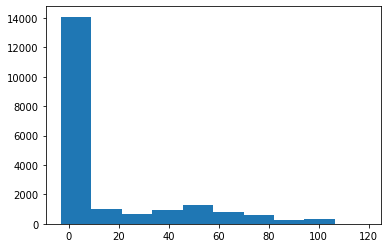

In [59]:
plt.hist(train['aaa_rating'])

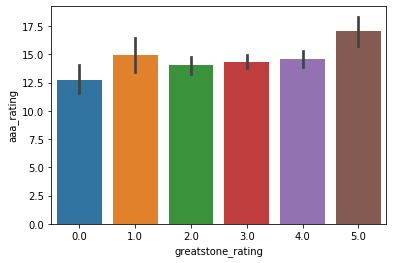

In [60]:
sns.barplot(x='greatstone_rating',y='aaa_rating',data=train)

In [61]:
train['aa_rating'].describe()

count    19905.000000
mean         4.242519
std         11.228702
min         -0.190000
25%          0.000000
50%          0.000000
75%          3.020000
max         85.680000
Name: aa_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([17674.,   781.,   282.,   296.,   269.,   251.,   200.,   100.,
           32.,    20.]),
 array([-0.19 ,  8.397, 16.984, 25.571, 34.158, 42.745, 51.332, 59.919,
        68.506, 77.093, 85.68 ]),
 <a list of 10 Patch objects>)

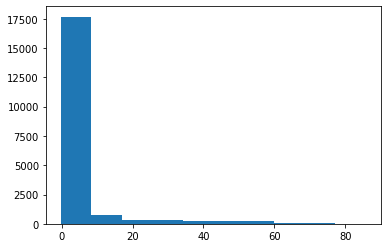

In [62]:
plt.hist(train['aa_rating'])

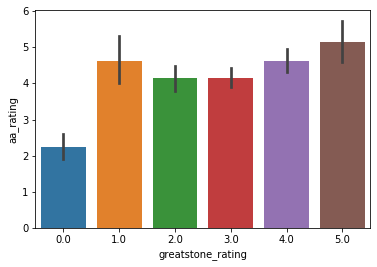

In [63]:
sns.barplot(x='greatstone_rating',y='aa_rating',data=train)

In [64]:
train['bbb_rating'].describe()

count    19905.000000
mean         6.126279
std         10.600297
min          0.000000
25%          0.000000
50%          0.000000
75%         11.410000
max         98.000000
Name: bbb_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.4522e+04, 3.3920e+03, 1.2130e+03, 4.6700e+02, 1.3300e+02,
        1.0600e+02, 4.4000e+01, 2.1000e+01, 6.0000e+00, 1.0000e+00]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <a list of 10 Patch objects>)

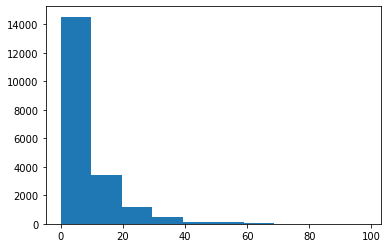

In [65]:
plt.hist(train['bbb_rating'])

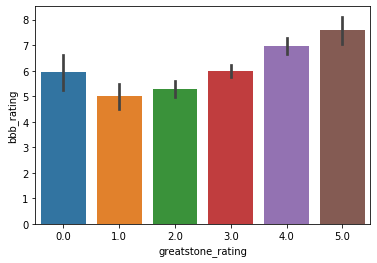

In [66]:
sns.barplot(x='greatstone_rating',y='bbb_rating',data=train)

In [67]:
train['portfolio_communication_allocation'].describe()

count    19905.000000
mean         2.261577
std          4.396549
min          0.000000
25%          0.000000
50%          1.150000
75%          3.400000
max        100.000000
Name: portfolio_communication_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.9475e+04, 3.0700e+02, 3.8000e+01, 4.4000e+01, 1.4000e+01,
        1.1000e+01, 0.0000e+00, 0.0000e+00, 3.0000e+00, 1.3000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

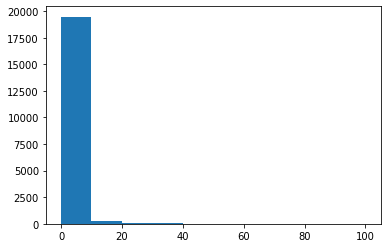

In [68]:
plt.hist(train['portfolio_communication_allocation'])

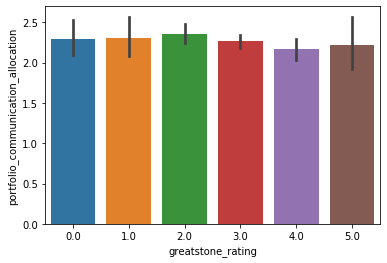

In [69]:
sns.barplot(x='greatstone_rating',y='portfolio_communication_allocation',data=train)

In [75]:
train['portfolio_financial_services'].describe()

count    19905.000000
mean        11.785566
std         12.143767
min          0.000000
25%          0.000000
50%         13.130000
75%         17.910000
max        100.000000
Name: portfolio_financial_services, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8670., 7718., 2879.,  403.,   55.,   20.,   12.,   11.,   12.,
         125.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

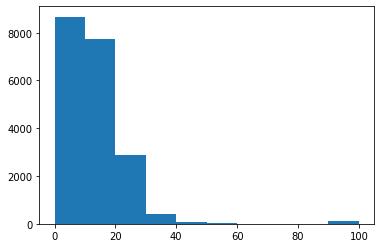

In [77]:
plt.hist(train['portfolio_financial_services'])

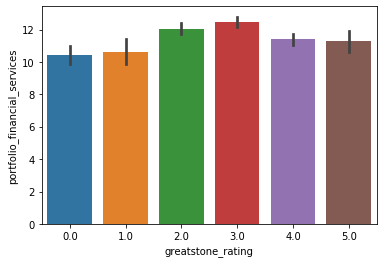

In [78]:
sns.barplot(x='greatstone_rating',y='portfolio_financial_services',data=train)

In [79]:
train['portfolio_industrials_allocation'].describe()

count    19905.000000
mean         9.115915
std         10.225477
min          0.000000
25%          0.000000
50%          9.650000
75%         12.800000
max        100.000000
Name: portfolio_industrials_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([10403.,  8167.,   939.,   166.,    48.,    53.,    14.,    17.,
           12.,    86.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

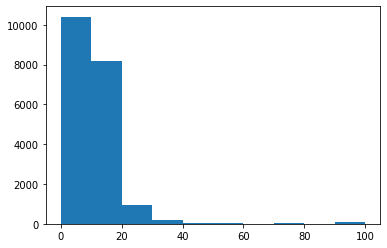

In [80]:
plt.hist(train['portfolio_industrials_allocation'])

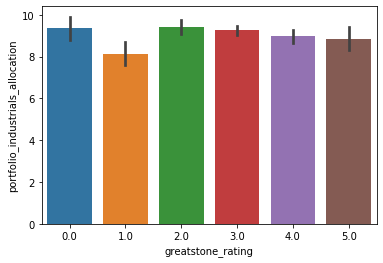

In [81]:
sns.barplot(x='greatstone_rating',y='portfolio_industrials_allocation',data=train)

In [82]:
train['portfolio_tech_allocation'].describe()

count    19905.000000
mean        12.734695
std         12.444791
min          0.000000
25%          0.000000
50%         12.850000
75%         19.620000
max        100.000000
Name: portfolio_tech_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8579., 6546., 3309., 1099.,  166.,   69.,   36.,   53.,   21.,
          27.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

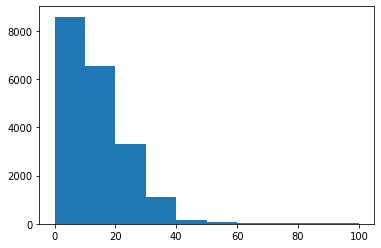

In [83]:
plt.hist(train['portfolio_tech_allocation'])

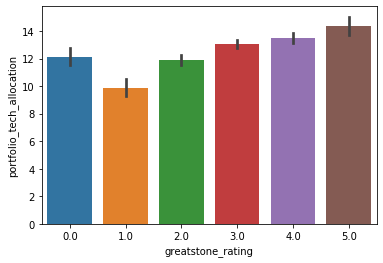

In [85]:
sns.barplot(x='greatstone_rating',y='portfolio_tech_allocation',data=train)

In [86]:
train['portfolio_materials_basic_allocation'].describe()

count    19905.000000
mean         3.920182
std          8.239750
min          0.000000
25%          0.000000
50%          2.790000
75%          5.060000
max        100.000000
Name: portfolio_materials_basic_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.8838e+04, 7.6300e+02, 8.3000e+01, 5.9000e+01, 3.0000e+01,
        1.5000e+01, 1.1000e+01, 1.0000e+00, 1.5000e+01, 9.0000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

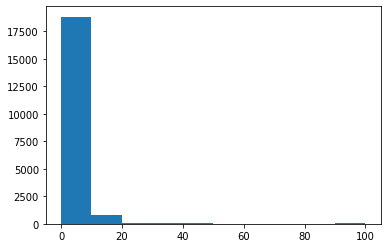

In [87]:
plt.hist(train['portfolio_materials_basic_allocation'])

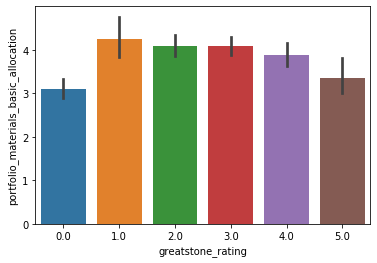

In [88]:
sns.barplot(x='greatstone_rating',y='portfolio_materials_basic_allocation',data=train)

In [89]:
train['portfolio_energy_allocation'].describe()

count    19905.000000
mean         5.790631
std         13.499269
min          0.000000
25%          0.000000
50%          3.420000
75%          6.240000
max        100.000000
Name: portfolio_energy_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.8007e+04, 1.2180e+03, 1.4200e+02, 6.5000e+01, 4.0000e+01,
        3.7000e+01, 5.8000e+01, 2.5000e+01, 9.0000e+00, 3.0400e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

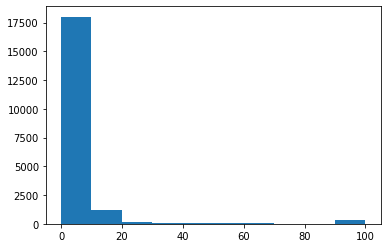

In [90]:
plt.hist(train['portfolio_energy_allocation'])

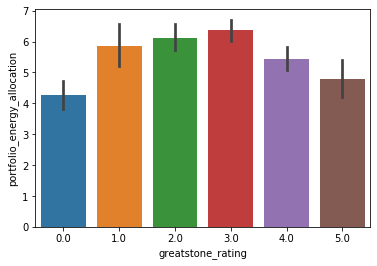

In [92]:
sns.barplot(x='greatstone_rating',y='portfolio_energy_allocation',data=train)

In [93]:
train['portfolio_consumer_defence_allocation'].describe()

count    19905.000000
mean         5.072386
std          5.925698
min          0.000000
25%          0.000000
50%          4.840000
75%          7.870000
max        100.000000
Name: portfolio_consumer_defence_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7221e+04, 2.4380e+03, 1.5800e+02, 4.5000e+01, 1.4000e+01,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00, 1.4000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

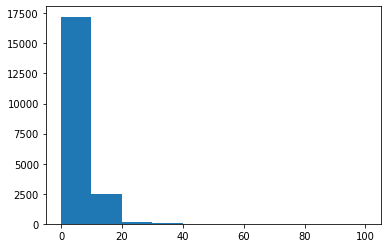

In [94]:
plt.hist(train['portfolio_consumer_defence_allocation'])

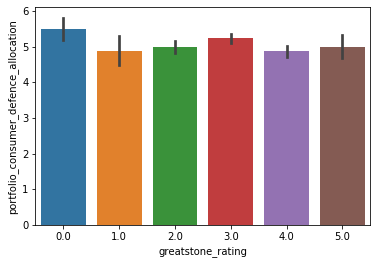

In [95]:
sns.barplot(x='greatstone_rating',y='portfolio_consumer_defence_allocation',data=train)

In [96]:
train['portfolio_healthcare_allocation'].describe()

count    19905.000000
mean         8.551280
std          9.666586
min          0.000000
25%          0.000000
50%          9.400000
75%         13.560000
max        100.000000
Name: portfolio_healthcare_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.0357e+04, 8.5960e+03, 7.2800e+02, 8.1000e+01, 3.0000e+01,
        8.0000e+00, 2.0000e+00, 1.5000e+01, 3.0000e+00, 8.5000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

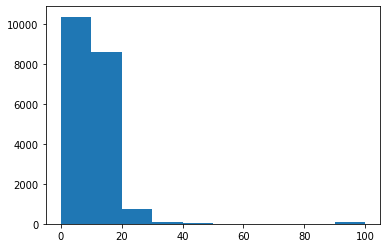

In [97]:
plt.hist(train['portfolio_healthcare_allocation'])

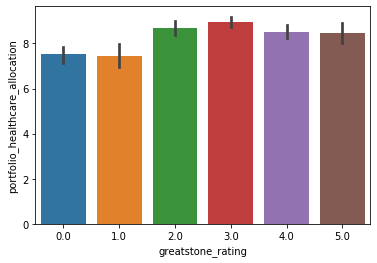

In [98]:
sns.barplot(x='greatstone_rating',y='portfolio_healthcare_allocation',data=train)

In [99]:
train['portfolio_property_allocation'].describe()

count    19905.000000
mean         4.933095
std         13.853599
min          0.000000
25%          0.000000
50%          1.560000
75%          4.480000
max        100.000000
Name: portfolio_property_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.8274e+04, 9.4300e+02, 1.4700e+02, 7.9000e+01, 2.5000e+01,
        3.5000e+01, 2.0000e+01, 5.0000e+00, 5.2000e+01, 3.2500e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

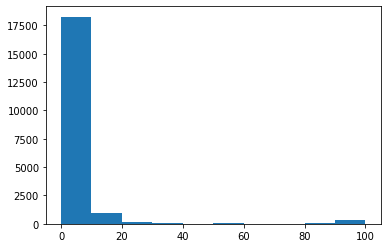

In [100]:
plt.hist(train['portfolio_property_allocation'])

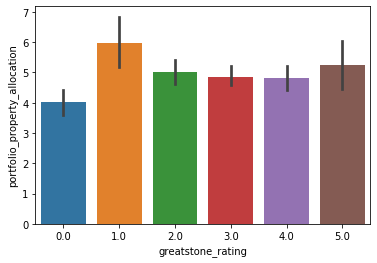

In [102]:
sns.barplot(x='greatstone_rating',y='portfolio_property_allocation',data=train)

In [7]:
train.drop(columns=['id'],inplace=True)

In [106]:
train['portfolio_utils_allocation'].describe()

count    19905.000000
mean         2.789291
std          7.685019
min          0.000000
25%          0.000000
50%          0.430000
75%          3.340000
max        100.000000
Name: portfolio_utils_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.9202e+04, 3.6600e+02, 7.8000e+01, 5.8000e+01, 8.6000e+01,
        1.9000e+01, 1.5000e+01, 1.0000e+01, 1.0000e+01, 6.1000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

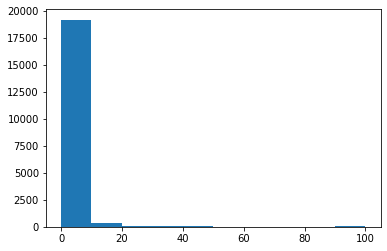

In [107]:
plt.hist(train['portfolio_utils_allocation'])

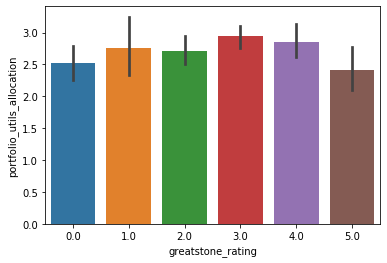

In [108]:
sns.barplot(x='greatstone_rating',y='portfolio_utils_allocation',data=train)

In [109]:
train['portfolio_cyclical_consumer_allocation'].describe()

count    19905.000000
mean         9.212074
std          9.755071
min          0.000000
25%          0.000000
50%         10.450000
75%         13.200000
max        100.000000
Name: portfolio_cyclical_consumer_allocation, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([9.533e+03, 9.137e+03, 9.290e+02, 1.400e+02, 2.300e+01, 3.600e+01,
        8.000e+00, 2.200e+01, 9.000e+00, 6.800e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

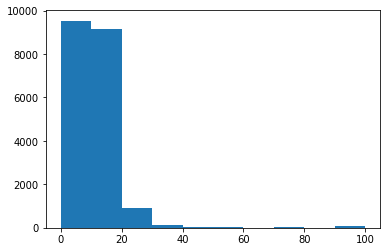

In [110]:
plt.hist(train['portfolio_cyclical_consumer_allocation'])

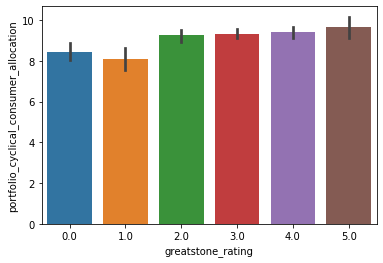

In [111]:
sns.barplot(x='greatstone_rating',y='portfolio_cyclical_consumer_allocation',data=train)

In [114]:
train['category'].value_counts()

Large Growth                      1044
Large Blend                       1044
Large Value                        901
Intermediate-Term Bond             763
World Large Stock                  666
Diversified Emerging Mkts          594
Allocation - 50% to 70% Equity     568
Small Blend                        546
Foreign Large Blend                538
High Yield Bond                    533
Small Growth                       519
Mid-Cap Growth                     466
Allocation - 30% to 50% Equity     418
Short-Term Bond                    404
World Allocation                   360
Foreign Large Growth               344
Small Value                        343
Mid-Cap Blend                      331
Mid-Cap Value                      304
Multialternative                   275
Multisector Bond                   255
Allocation - 70% to 85% Equity     249
Emerging Markets Bond              240
World Bond                         235
Nontraditional Bond                225
Muni National Interm     

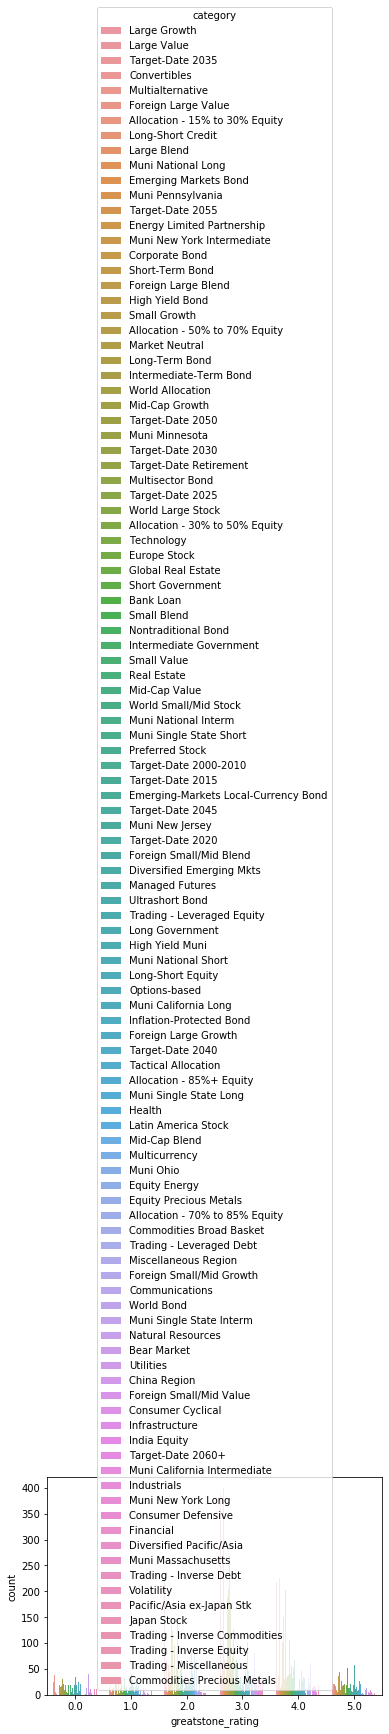

In [116]:
sns.countplot(train['greatstone_rating'],hue=train['category'])

In [117]:
train['greatstone_rating'].value_counts()

3.0    6786
4.0    4614
2.0    4230
5.0    1629
1.0    1376
0.0    1365
Name: greatstone_rating, dtype: int64

In [126]:
cat_rat =pd.DataFrame(train['category'][train['greatstone_rating']==0].value_counts().head(10))
cat_rat['category']=cat_rat['category'].apply(lambda x: (x/1365)*100)
cat_rat

,category
World Large Stock,5.347985
Large Blend,4.395604
Target-Date 2060+,4.249084
Bear Market,3.003663
Options-based,3.003663
Emerging Markets Bond,2.930403
Multialternative,2.783883
Intermediate-Term Bond,2.710623
Diversified Emerging Mkts,2.490842
Large Growth,2.490842


In [127]:
cat_rat =pd.DataFrame(train['category'][train['greatstone_rating']==1].value_counts().head(10))
cat_rat['category']=cat_rat['category'].apply(lambda x: (x/1376)*100)
cat_rat

,category
Large Growth,5.232558
Large Blend,5.014535
Large Value,5.014535
Allocation - 50% to 70% Equity,3.125000
Diversified Emerging Mkts,2.906977
Allocation - 30% to 50% Equity,2.834302
Intermediate-Term Bond,2.616279
Short-Term Bond,2.398256
Small Blend,2.325581
World Large Stock,2.252907


In [128]:
cat_rat =pd.DataFrame(train['category'][train['greatstone_rating']==2].value_counts().head(10))
cat_rat['category']=cat_rat['category'].apply(lambda x: (x/4230)*100)
cat_rat

,category
Large Blend,5.413712
Large Growth,5.271868
Large Value,4.609929
World Large Stock,3.451537
Intermediate-Term Bond,3.356974
Foreign Large Blend,3.167849
Small Blend,3.096927
Allocation - 50% to 70% Equity,2.931442
Diversified Emerging Mkts,2.576832
High Yield Bond,2.553191


In [129]:
cat_rat =pd.DataFrame(train['category'][train['greatstone_rating']==3].value_counts().head(10))
cat_rat['category']=cat_rat['category'].apply(lambda x: (x/6786)*100)
cat_rat

,category
Large Blend,5.894489
Large Growth,5.702918
Large Value,5.437666
Intermediate-Term Bond,3.964044
World Large Stock,3.124079
Allocation - 50% to 70% Equity,3.006189
Diversified Emerging Mkts,2.991453
Foreign Large Blend,2.961981
Small Blend,2.947244
High Yield Bond,2.785146


In [130]:
cat_rat =pd.DataFrame(train['category'][train['greatstone_rating']==4].value_counts().head(10))
cat_rat['category']=cat_rat['category'].apply(lambda x: (x/4614)*100)
cat_rat

,category
Large Growth,5.461638
Large Blend,4.876463
Large Value,4.746424
Intermediate-Term Bond,4.399653
Diversified Emerging Mkts,3.272648
High Yield Bond,3.272648
World Large Stock,3.120936
Small Growth,2.990897
Allocation - 50% to 70% Equity,2.839185
Mid-Cap Growth,2.579107


In [131]:
cat_rat =pd.DataFrame(train['category'][train['greatstone_rating']==5].value_counts().head(10))
cat_rat['category']=cat_rat['category'].apply(lambda x: (x/1629)*100)
cat_rat

,category
Intermediate-Term Bond,4.665439
Large Growth,4.665439
Large Blend,3.744629
World Large Stock,3.683241
Diversified Emerging Mkts,3.499079
Small Blend,3.192142
Allocation - 50% to 70% Equity,3.130755
Small Growth,2.701044
Allocation - 30% to 50% Equity,2.578269
Foreign Large Growth,2.332719


In [135]:
train['investment_class'].value_counts()

Blend     9422
Growth    5328
Value     5250
Name: investment_class, dtype: int64

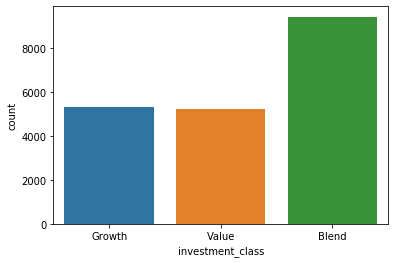

In [136]:
sns.countplot(train['investment_class'])

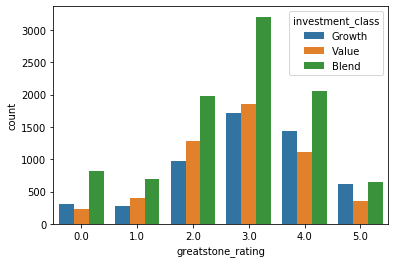

In [137]:
sns.countplot(train['greatstone_rating'],hue=train['investment_class'])

In [202]:
inv_rat =pd.DataFrame(train['investment_class'][train['greatstone_rating']==0].value_counts())
inv_rat['investment_class']=inv_rat['investment_class'].apply(lambda x: (x/1365)*100)
inv_rat

,investment_class
Blend,60.512821
Growth,22.271062
Value,17.216117


In [201]:
inv_rat =pd.DataFrame(train['investment_class'][train['greatstone_rating']==1].value_counts())
inv_rat['investment_class']=inv_rat['investment_class'].apply(lambda x: (x/1376)*100)
inv_rat

,investment_class
Blend,50.872093
Value,29.215116
Growth,19.912791


In [200]:
inv_rat =pd.DataFrame(train['investment_class'][train['greatstone_rating']==2].value_counts())
inv_rat['investment_class']=inv_rat['investment_class'].apply(lambda x: (x/4230)*100)
inv_rat

,investment_class
Blend,46.761229
Value,30.330969
Growth,22.907801


In [199]:
inv_rat =pd.DataFrame(train['investment_class'][train['greatstone_rating']==3].value_counts())
inv_rat['investment_class']=inv_rat['investment_class'].apply(lambda x: (x/6786)*100)
inv_rat

,investment_class
Blend,47.244327
Value,27.394636
Growth,25.361037


In [198]:
inv_rat =pd.DataFrame(train['investment_class'][train['greatstone_rating']==4].value_counts())
inv_rat['investment_class']=inv_rat['investment_class'].apply(lambda x: (x/4614)*100)
inv_rat

,investment_class
Blend,44.625054
Growth,31.166016
Value,24.208929


In [197]:
inv_rat =pd.DataFrame(train['investment_class'][train['greatstone_rating']==5].value_counts().head())
inv_rat['investment_class']=inv_rat['investment_class'].apply(lambda x: (x/1629)*100)
inv_rat

,investment_class
Blend,40.085942
Growth,38.182934
Value,21.731123


In [242]:
train.drop(columns=['currency'],inplace=True)

In [142]:
train['total_assets'].describe()

count    2.000000e+04
mean     3.515147e+09
std      1.898775e+10
min      1.916000e+04
25%      9.360000e+07
50%      4.379000e+08
75%      1.600000e+09
max      7.727200e+11
Name: total_assets, dtype: float64

(array([1.9819e+04, 1.3300e+02, 3.7000e+01, 0.0000e+00, 4.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([1.91600000e+04, 7.72720172e+10, 1.54544015e+11, 2.31816013e+11,
        3.09088011e+11, 3.86360010e+11, 4.63632008e+11, 5.40904006e+11,
        6.18176004e+11, 6.95448002e+11, 7.72720000e+11]),
 <a list of 10 Patch objects>)

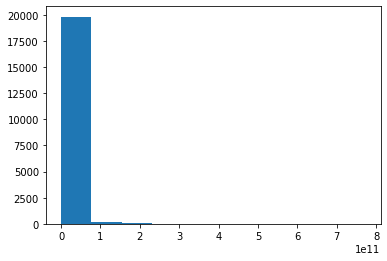

In [143]:
plt.hist(train['total_assets'])

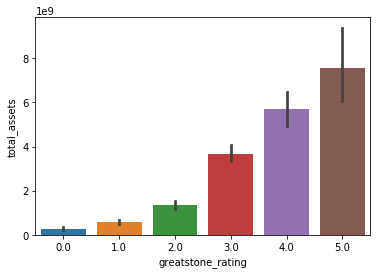

In [144]:
sns.barplot(x='greatstone_rating',y='total_assets',data=train)

In [145]:
train['yield'].describe()

count    20000.000000
mean         1.848717
std          1.769850
min          0.000000
25%          0.480000
50%          1.670000
75%          2.630000
max         30.160000
Name: yield, dtype: float64

(array([1.6408e+04, 3.2210e+03, 2.6900e+02, 5.3000e+01, 1.9000e+01,
        1.7000e+01, 4.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.   ,  3.016,  6.032,  9.048, 12.064, 15.08 , 18.096, 21.112,
        24.128, 27.144, 30.16 ]),
 <a list of 10 Patch objects>)

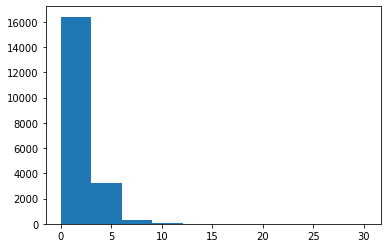

In [146]:
plt.hist(train['yield'])

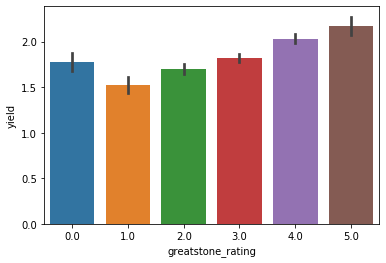

In [147]:
sns.barplot(x='greatstone_rating',y='yield',data=train)

Assumption -1 seems to be wrong because for many features rating zero is having different patterns from others

In [9]:
import datetime
train['inception_date']=pd.to_datetime(train['inception_date'])

In [180]:
train['inception_date'].describe()

count                   20000
unique                   4008
top       2015-06-29 00:00:00
freq                       99
first     1924-07-14 00:00:00
last      2019-02-27 00:00:00
Name: inception_date, dtype: object

In [10]:
today=datetime.datetime(2019,3,1)
train['age']=train['inception_date'].apply(lambda x: ((today-x).days)/365)

In [183]:
train['age'].describe()

count    20000.000000
mean        11.625998
std          8.971454
min          0.005479
25%          4.692466
50%          9.660274
75%         16.690411
max         94.693151
Name: age, dtype: float64

(array([9888., 6403., 2945.,  565.,   97.,   43.,   15.,   19.,   13.,
          12.]),
 array([5.47945205e-03, 9.47424658e+00, 1.89430137e+01, 2.84117808e+01,
        3.78805479e+01, 4.73493151e+01, 5.68180822e+01, 6.62868493e+01,
        7.57556164e+01, 8.52243836e+01, 9.46931507e+01]),
 <a list of 10 Patch objects>)

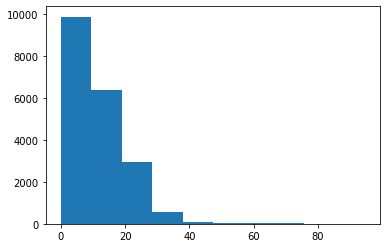

In [184]:
plt.hist(train['age'])

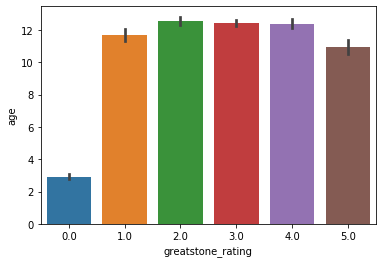

In [185]:
sns.barplot(x='greatstone_rating',y='age',data=train)

In [186]:
train['age'][train['greatstone_rating']==0].describe()

count    1365.000000
mean        2.919015
std         3.349677
min         0.205479
25%         1.430137
50%         2.169863
75%         2.668493
max        29.306849
Name: age, dtype: float64

(array([1.181e+03, 8.600e+01, 1.800e+01, 1.100e+01, 3.200e+01, 1.900e+01,
        1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.20547945,  3.11561644,  6.02575342,  8.93589041, 11.8460274 ,
        14.75616438, 17.66630137, 20.57643836, 23.48657534, 26.39671233,
        29.30684932]),
 <a list of 10 Patch objects>)

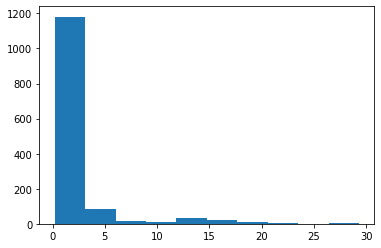

In [187]:
plt.hist(train['age'][train['greatstone_rating']==0])

Majority of zero greatstone ratings are funds below 3 years of age.Indicating that these might be missing values or not rated funds.

In [11]:
train.drop(columns=['inception_date'],inplace=True)

In [190]:
train['fund_size'].value_counts()

Large     12510
Medium     4818
Small      2672
Name: fund_size, dtype: int64

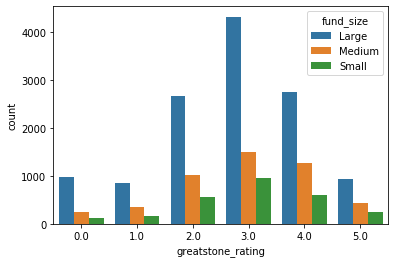

In [193]:
sns.countplot(train['greatstone_rating'],hue=train['fund_size'])

In [203]:
train['return_ytd'].describe()

count    20000.000000
mean         9.256368
std          5.772068
min        -36.300000
25%          4.440000
50%          9.780000
75%         13.040000
max         45.880000
Name: return_ytd, dtype: float64

(array([2.000e+00, 2.700e+01, 3.800e+01, 9.100e+01, 5.087e+03, 9.702e+03,
        4.676e+03, 3.410e+02, 3.400e+01, 2.000e+00]),
 array([-36.3  , -28.082, -19.864, -11.646,  -3.428,   4.79 ,  13.008,
         21.226,  29.444,  37.662,  45.88 ]),
 <a list of 10 Patch objects>)

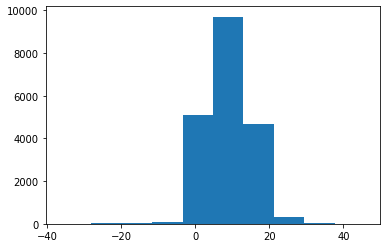

In [204]:
plt.hist(train['return_ytd'])

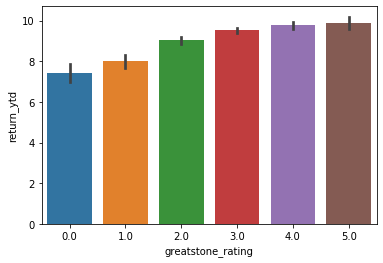

In [205]:
sns.barplot(x='greatstone_rating',y='return_ytd',data=train)

In [206]:
train['fund_ratio_net_annual_expense'].describe()

count    20000.000000
mean         1.121047
std          0.608311
min          0.000000
25%          0.710000
50%          1.010000
75%          1.440000
max         10.640000
Name: fund_ratio_net_annual_expense, dtype: float64

(array([1.0798e+04, 8.1040e+03, 9.6100e+02, 1.0100e+02, 2.7000e+01,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.   ,  1.064,  2.128,  3.192,  4.256,  5.32 ,  6.384,  7.448,
         8.512,  9.576, 10.64 ]),
 <a list of 10 Patch objects>)

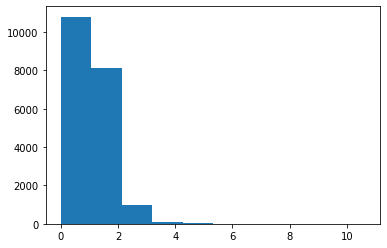

In [208]:
plt.hist(train['fund_ratio_net_annual_expense'])

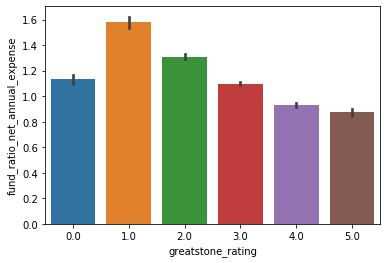

In [209]:
sns.barplot(x='greatstone_rating',y='fund_ratio_net_annual_expense',data=train)

In [210]:
train['pb_ratio'].describe()

count    19905.000000
mean         1.844200
std          2.882882
min          0.000000
25%          0.560000
50%          1.850000
75%          2.380000
max        123.300000
Name: pb_ratio, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.988e+04, 1.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00]),
 array([  0.  ,  12.33,  24.66,  36.99,  49.32,  61.65,  73.98,  86.31,
         98.64, 110.97, 123.3 ]),
 <a list of 10 Patch objects>)

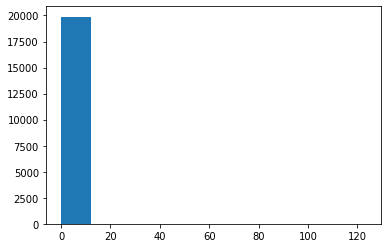

In [211]:
plt.hist(train['pb_ratio'])

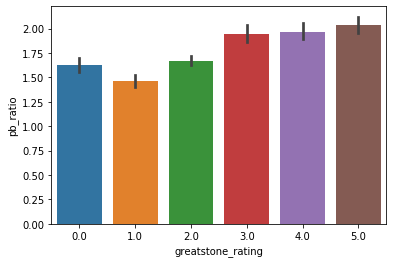

In [212]:
sns.barplot(x='greatstone_rating',y='pb_ratio',data=train)

In [232]:
train[train['ps_ratio']=='2,777.78']

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,b_rating,tag,a_rating,aaa_rating,aa_rating,bbb_rating,...,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_category,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
2764,0.0,0.0,0.0,0.0,0.0,226034,0.0,0.0,0.0,0.0,...,3.03,0.81,-0.01,-0.01,-0.13,-3.49,-0.01,0.01,0.12,-8.35
10280,0.0,0.0,0.0,0.0,0.0,226025,0.0,0.0,0.0,0.0,...,3.03,0.81,-0.01,-0.01,-0.13,-4.33,-0.01,0.01,0.12,-8.35
15661,0.0,0.0,0.0,0.0,0.0,226016,0.0,0.0,0.0,0.0,...,3.03,0.81,-0.01,-0.01,-0.13,-3.70,-0.01,0.01,0.12,-8.35


In [12]:
train['ps_ratio']=train['ps_ratio'].apply(lambda x: '2777.78' if(x=='2,777.78') else x)

In [13]:
train['ps_ratio']=train['ps_ratio'].astype('float64')

In [248]:
train['ps_ratio'].describe()

count    19905.000000
mean         1.830336
std         34.195284
min          0.000000
25%          0.320000
50%          1.290000
75%          1.800000
max       2777.780000
Name: ps_ratio, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.9902e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0.   ,  277.778,  555.556,  833.334, 1111.112, 1388.89 ,
        1666.668, 1944.446, 2222.224, 2500.002, 2777.78 ]),
 <a list of 10 Patch objects>)

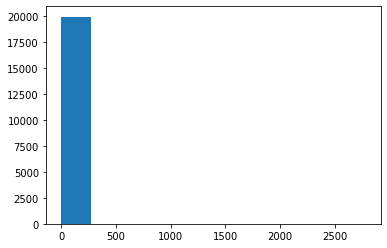

In [249]:
plt.hist(train['ps_ratio'])

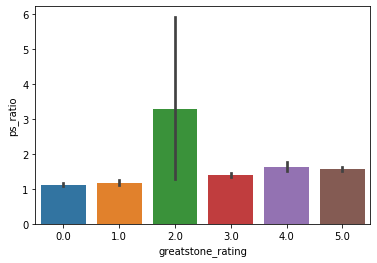

In [251]:
sns.barplot(x='greatstone_rating',y='ps_ratio',data=train)

In [265]:
def charcheck(x):
        l = len(x)
        for i in range(0,l):
            h= str(x[i]).isdigit()
            if (not(h)):
                print(x[i],'is in ' ,i)

In [264]:
train['mmc'].describe()

count     19905
unique     5340
top           0
freq       4821
Name: mmc, dtype: object

In [15]:
import re
train['mmc'] = train['mmc'].apply(lambda x: re.sub(',','',str(x)))

In [16]:
train['mmc'] =train['mmc'].astype('float64')
train['mmc'].describe()

count     19905.000000
mean      28189.264936
std       33639.867317
min           0.000000
25%         445.750000
50%       16818.330000
75%       42958.600000
max      363960.310000
Name: mmc, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.3625e+04, 4.0400e+03, 1.6440e+03, 4.5600e+02, 1.1300e+02,
        1.3000e+01, 4.0000e+00, 6.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([     0.   ,  36396.031,  72792.062, 109188.093, 145584.124,
        181980.155, 218376.186, 254772.217, 291168.248, 327564.279,
        363960.31 ]),
 <a list of 10 Patch objects>)

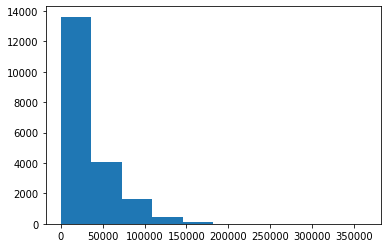

In [281]:
plt.hist(train['mmc'])

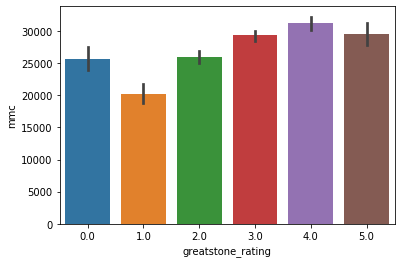

In [282]:
sns.barplot(x='greatstone_rating',y='mmc',data=train)

In [283]:
train['pc_ratio'].describe()

count     19905
unique     1548
top           0
freq       3327
Name: pc_ratio, dtype: object

In [17]:
train['pc_ratio'] = train['pc_ratio'].apply(lambda x: re.sub(',','',str(x)))
train['pc_ratio'] =train['pc_ratio'].astype('float64')
train['pc_ratio'].describe()

count    19905.000000
mean        19.877164
std        511.412487
min          0.000000
25%          0.510000
50%          6.980000
75%          8.940000
max      20000.000000
Name: pc_ratio, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.9891e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01]),
 array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000., 20000.]),
 <a list of 10 Patch objects>)

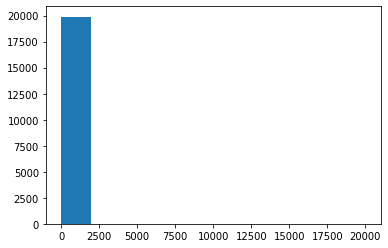

In [286]:
plt.hist(train['pc_ratio'])

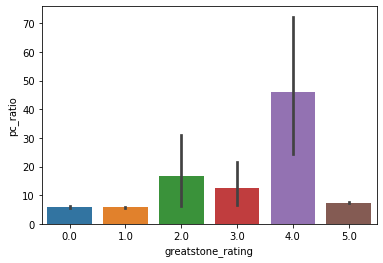

In [287]:
sns.barplot(x='greatstone_rating',y='pc_ratio',data=train)

In [288]:
train['pe_ratio'].describe()

count     19905
unique     1735
top           0
freq       3313
Name: pe_ratio, dtype: object

In [18]:
train['pe_ratio'] = train['pe_ratio'].apply(lambda x: re.sub(',','',str(x)))
train['pe_ratio'] =train['pe_ratio'].astype('float64')
train['pe_ratio'].describe()

count    19905.000000
mean        13.565700
std         47.572818
min          0.000000
25%          4.440000
50%         13.980000
75%         16.430000
max       1694.920000
Name: pe_ratio, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.9889e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.4000e+01]),
 array([   0.   ,  169.492,  338.984,  508.476,  677.968,  847.46 ,
        1016.952, 1186.444, 1355.936, 1525.428, 1694.92 ]),
 <a list of 10 Patch objects>)

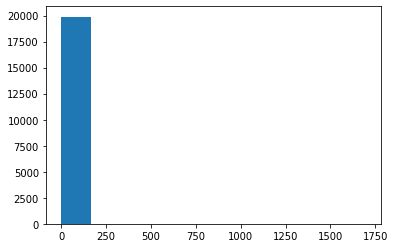

In [290]:
plt.hist(train['pe_ratio'])

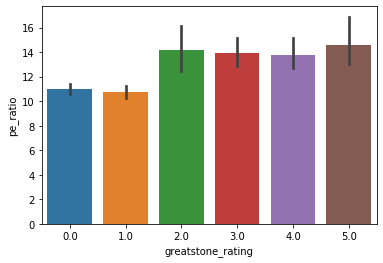

In [291]:
sns.barplot(x='greatstone_rating',y='pe_ratio',data=train)

In [292]:
train['years_up'].describe()

count    18560.000000
mean         8.444073
std          7.023012
min          1.000000
25%          3.000000
50%          7.000000
75%         12.000000
max         70.000000
Name: years_up, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.0183e+04, 5.3490e+03, 2.1870e+03, 5.6500e+02, 1.6500e+02,
        5.4000e+01, 2.5000e+01, 1.4000e+01, 9.0000e+00, 9.0000e+00]),
 array([ 1. ,  7.9, 14.8, 21.7, 28.6, 35.5, 42.4, 49.3, 56.2, 63.1, 70. ]),
 <a list of 10 Patch objects>)

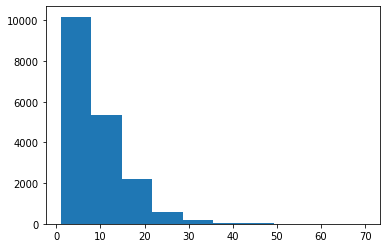

In [293]:
plt.hist(train['years_up'])

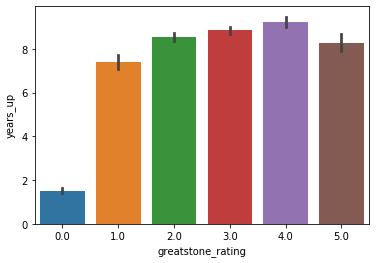

In [294]:
sns.barplot(x='greatstone_rating',y='years_up',data=train)

In [295]:
train['2018_return_category'].describe()

count    19359.000000
mean        -6.480064
std          5.424309
min        -27.270000
25%         -9.270000
50%         -6.250000
75%         -2.090000
max          7.190000
Name: 2018_return_category, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  60.,   40.,  350., 2426., 1255., 4295., 4681., 4130., 2077.,
          45.]),
 array([-27.27 , -23.824, -20.378, -16.932, -13.486, -10.04 ,  -6.594,
         -3.148,   0.298,   3.744,   7.19 ]),
 <a list of 10 Patch objects>)

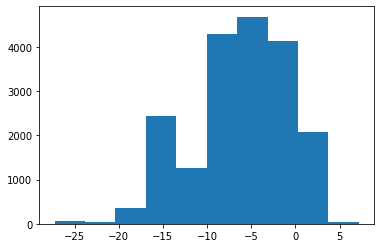

In [296]:
plt.hist(train['2018_return_category'])

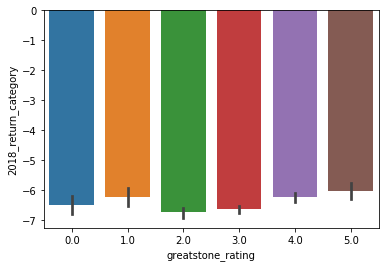

In [297]:
sns.barplot(x='greatstone_rating',y='2018_return_category',data=train)

In [298]:
train['category_return_1year'].describe()

count    19907.000000
mean         2.729826
std          5.015292
min        -10.920000
25%          0.660000
50%          3.070000
75%          4.520000
max         17.480000
Name: category_return_1year, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 958.,  495., 1597., 1917., 5471., 5473., 2122., 1416.,  241.,
         217.]),
 array([-10.92,  -8.08,  -5.24,  -2.4 ,   0.44,   3.28,   6.12,   8.96,
         11.8 ,  14.64,  17.48]),
 <a list of 10 Patch objects>)

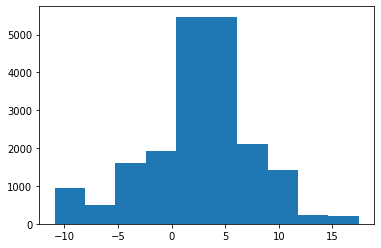

In [299]:
plt.hist(train['category_return_1year'])

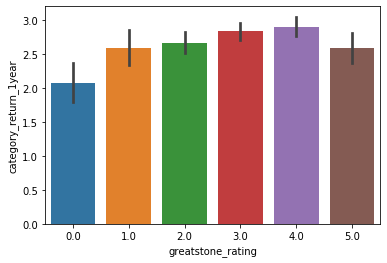

In [301]:
sns.barplot(x='greatstone_rating',y='category_return_1year',data=train)

In [302]:
train['cash_percent_of_portfolio'].describe()

count    19905.00000
mean         7.38607
std         12.97795
min          0.00000
25%          1.23000
50%          3.12000
75%          7.01000
max        100.00000
Name: cash_percent_of_portfolio, dtype: float64

(array([16472.,  1522.,   793.,   465.,   235.,   133.,    77.,    77.,
           26.,   105.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

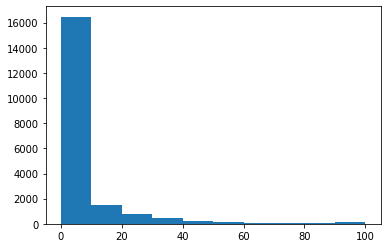

In [304]:
import warnings
warnings.filterwarnings("ignore")
plt.hist(train['cash_percent_of_portfolio'])

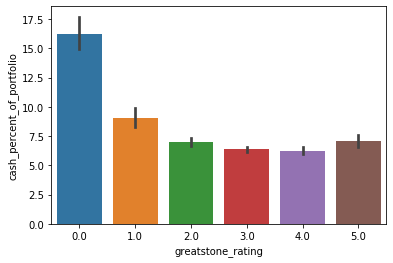

In [303]:
sns.barplot(x='greatstone_rating',y='cash_percent_of_portfolio',data=train)

In [305]:
train['ytd_return_fund'].describe()

count    19907.000000
mean         9.258653
std          5.778010
min        -36.300000
25%          4.400000
50%          9.820000
75%         13.060000
max         45.880000
Name: ytd_return_fund, dtype: float64

(array([2.000e+00, 2.600e+01, 3.900e+01, 8.600e+01, 5.088e+03, 9.614e+03,
        4.676e+03, 3.400e+02, 3.400e+01, 2.000e+00]),
 array([-36.3  , -28.082, -19.864, -11.646,  -3.428,   4.79 ,  13.008,
         21.226,  29.444,  37.662,  45.88 ]),
 <a list of 10 Patch objects>)

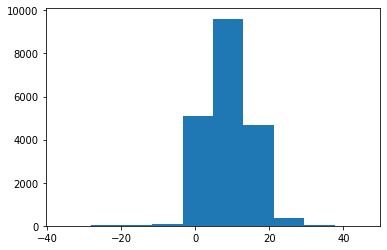

In [306]:
plt.hist(train['ytd_return_fund'])

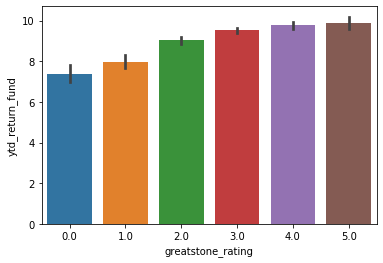

In [307]:
sns.barplot(x='greatstone_rating',y='ytd_return_fund',data=train)

In [308]:
train['years_down'].describe()

count    18688.000000
mean         3.249358
std          2.335370
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         28.000000
Name: years_down, dtype: float64

(array([1.1682e+04, 5.4400e+03, 1.2580e+03, 1.4400e+02, 9.7000e+01,
        3.5000e+01, 1.3000e+01, 1.1000e+01, 6.0000e+00, 2.0000e+00]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <a list of 10 Patch objects>)

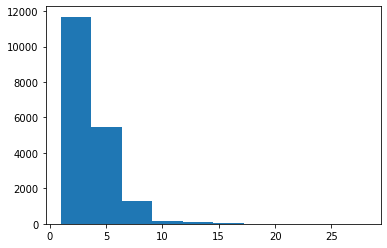

In [309]:
plt.hist(train['years_down'])

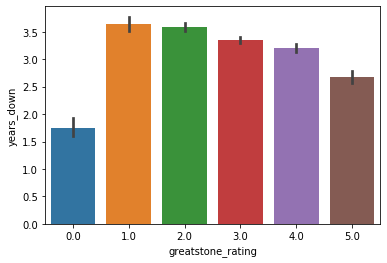

In [310]:
sns.barplot(x='greatstone_rating',y='years_down',data=train)

In [311]:
train['category_return_1month'].describe()

count    19907.000000
mean         0.869640
std          1.203035
min         -3.490000
25%          0.460000
50%          1.110000
75%          1.380000
max          9.680000
Name: category_return_1month, dtype: float64

(array([9.5700e+02, 6.6800e+02, 3.5020e+03, 1.1987e+04, 2.1940e+03,
        5.7000e+02, 1.8000e+01, 0.0000e+00, 0.0000e+00, 1.1000e+01]),
 array([-3.49 , -2.173, -0.856,  0.461,  1.778,  3.095,  4.412,  5.729,
         7.046,  8.363,  9.68 ]),
 <a list of 10 Patch objects>)

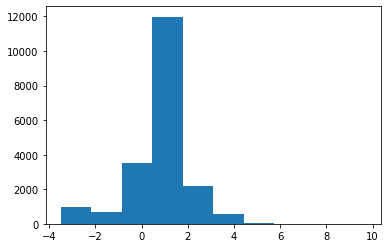

In [312]:
plt.hist(train['category_return_1month'])

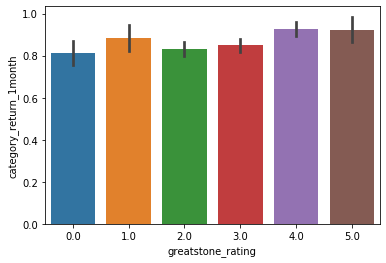

In [313]:
sns.barplot(x='greatstone_rating',y='category_return_1month',data=train)

In [314]:
train['fund_return_3months'].describe()

count    19907.000000
mean         9.135285
std          5.778148
min        -36.300000
25%          4.120000
50%          9.710000
75%         13.000000
max         45.880000
Name: fund_return_3months, dtype: float64

(array([2.000e+00, 2.600e+01, 3.800e+01, 9.800e+01, 5.287e+03, 9.484e+03,
        4.625e+03, 3.210e+02, 2.500e+01, 1.000e+00]),
 array([-36.3  , -28.082, -19.864, -11.646,  -3.428,   4.79 ,  13.008,
         21.226,  29.444,  37.662,  45.88 ]),
 <a list of 10 Patch objects>)

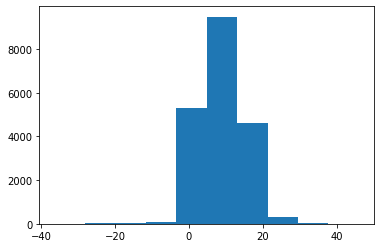

In [317]:
plt.hist(train['fund_return_3months'])

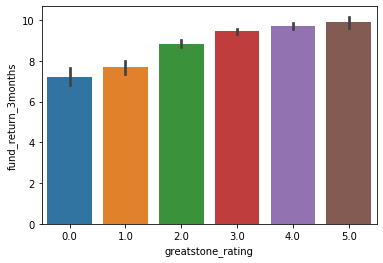

In [316]:
sns.barplot(x='greatstone_rating',y='fund_return_3months',data=train)

In [318]:
train['ytd_return_category'].describe()

count    19907.000000
mean         9.152417
std          5.007798
min        -17.380000
25%          5.020000
50%         10.240000
75%         12.940000
max         20.950000
Name: ytd_return_category, dtype: float64

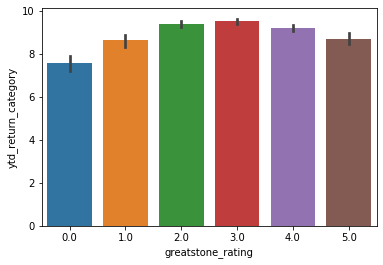

In [320]:
sns.barplot(x='greatstone_rating',y='ytd_return_category',data=train)

(array([  45.,    0.,    0.,    0., 1180., 4230., 3990., 6809., 2944.,
         709.]),
 array([-17.38 , -13.547,  -9.714,  -5.881,  -2.048,   1.785,   5.618,
          9.451,  13.284,  17.117,  20.95 ]),
 <a list of 10 Patch objects>)

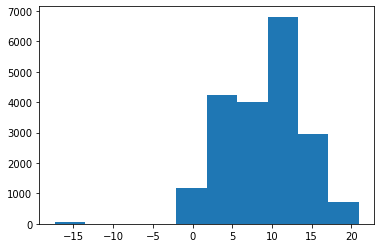

In [321]:
plt.hist(train['ytd_return_category'])

In [322]:
train['2017_category_return'].describe()

count    18863.000000
mean        14.826672
std          9.652589
min        -27.040000
25%          6.250000
50%         14.670000
75%         21.500000
max         46.780000
Name: 2017_category_return, dtype: float64

(array([  45.,    0.,   74., 1174., 5448., 5021., 4068., 2127.,  856.,
          50.]),
 array([-27.04 , -19.658, -12.276,  -4.894,   2.488,   9.87 ,  17.252,
         24.634,  32.016,  39.398,  46.78 ]),
 <a list of 10 Patch objects>)

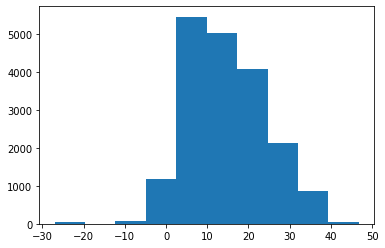

In [323]:
plt.hist(train['2017_category_return'])

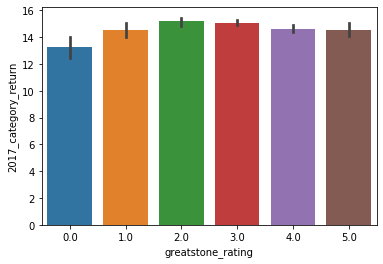

In [324]:
sns.barplot(x='greatstone_rating',y='2017_category_return', data=train)

In [326]:
train['1_year_return_fund'].describe()

count    19907.000000
mean         2.570241
std          6.657153
min        -36.540000
25%         -0.115000
50%          3.090000
75%          5.105000
max         59.190000
Name: 1_year_return_fund, dtype: float64

(array([1.2000e+01, 9.6000e+01, 1.2720e+03, 5.4820e+03, 1.1462e+04,
        1.4250e+03, 1.2200e+02, 2.9000e+01, 5.0000e+00, 2.0000e+00]),
 array([-36.54 , -26.967, -17.394,  -7.821,   1.752,  11.325,  20.898,
         30.471,  40.044,  49.617,  59.19 ]),
 <a list of 10 Patch objects>)

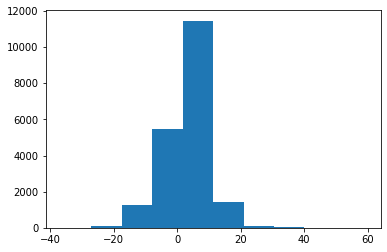

In [327]:
plt.hist(train['1_year_return_fund'])

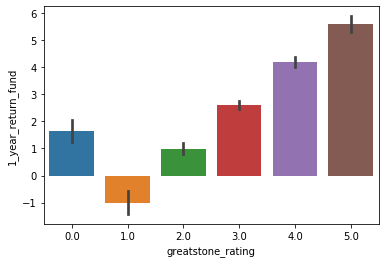

In [328]:
sns.barplot(x='greatstone_rating',y='1_year_return_fund',data=train)

count    19905.000000
mean         0.578635
std          4.867894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.070000
max         98.860000
Name: portfolio_convertable, dtype: float64
(array([1.9725e+04, 6.6000e+01, 3.5000e+01, 7.0000e+00, 1.0000e+00,
       2.0000e+00, 9.0000e+00, 3.4000e+01, 2.2000e+01, 4.0000e+00]), array([ 0.   ,  9.886, 19.772, 29.658, 39.544, 49.43 , 59.316, 69.202,
       79.088, 88.974, 98.86 ]), <a list of 10 Patch objects>)


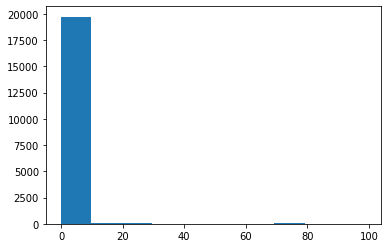

In [332]:
print(train['portfolio_convertable'].describe())
print(plt.hist(train['portfolio_convertable']))

AxesSubplot(0.125,0.125;0.775x0.755)


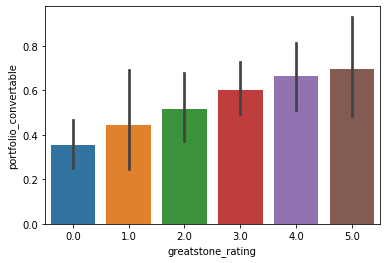

In [333]:
print(sns.barplot(x='greatstone_rating',y='portfolio_convertable',data=train))

In [334]:
train['3_months_return_category'].describe()

count    19907.000000
mean         9.152417
std          5.007798
min        -17.380000
25%          5.020000
50%         10.240000
75%         12.940000
max         20.950000
Name: 3_months_return_category, dtype: float64

(array([  45.,    0.,    0.,    0., 1180., 4230., 3990., 6809., 2944.,
         709.]),
 array([-17.38 , -13.547,  -9.714,  -5.881,  -2.048,   1.785,   5.618,
          9.451,  13.284,  17.117,  20.95 ]),
 <a list of 10 Patch objects>)

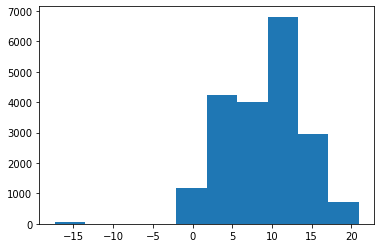

In [335]:
plt.hist(train['3_months_return_category'])

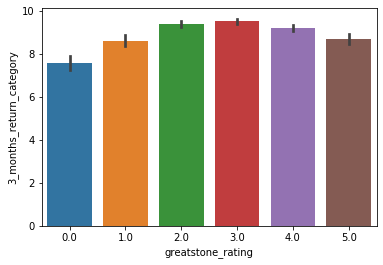

In [336]:
sns.barplot(x='greatstone_rating',y='3_months_return_category',data=train)

In [337]:
train['portfolio_others'].describe()

count    19905.000000
mean         1.049515
std          4.399977
min          0.000000
25%          0.000000
50%          0.000000
75%          0.280000
max         93.570000
Name: portfolio_others, dtype: float64

(array([1.9373e+04, 3.3700e+02, 9.9000e+01, 2.3000e+01, 1.5000e+01,
        3.6000e+01, 1.2000e+01, 1.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([ 0.   ,  9.357, 18.714, 28.071, 37.428, 46.785, 56.142, 65.499,
        74.856, 84.213, 93.57 ]),
 <a list of 10 Patch objects>)

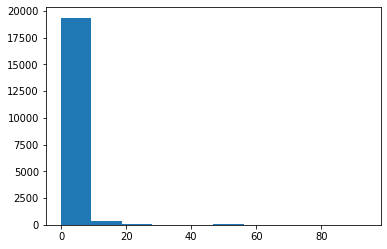

In [338]:
plt.hist(train['portfolio_others'])

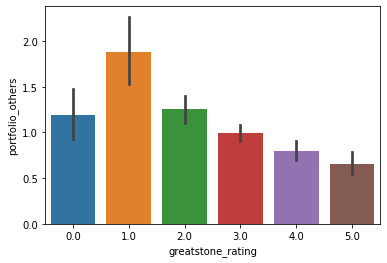

In [339]:
sns.barplot(x='greatstone_rating',y='portfolio_others',data=train)

In [340]:
train['stock_percent_of_portfolio'].describe()

count    19905.000000
mean        59.060725
std         42.281820
min          0.000000
25%          0.520000
50%         82.650000
75%         97.590000
max        100.000000
Name: stock_percent_of_portfolio, dtype: float64

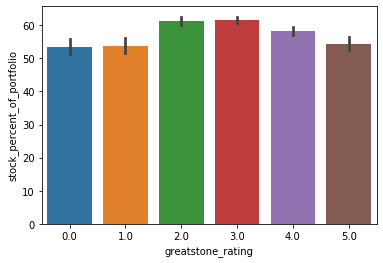

In [341]:
sns.barplot(x='greatstone_rating',y='stock_percent_of_portfolio',data=train)

(array([5662.,  419.,  437.,  581.,  586.,  715.,  681.,  710.,  962.,
        9152.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

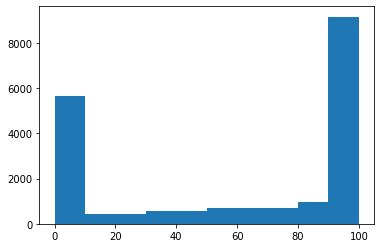

In [342]:
plt.hist(train['stock_percent_of_portfolio'])

In [344]:
train.rename(columns={'fund_return_3years_x':'fund_return_3years'},inplace=True)

In [345]:
train['fund_return_3years'].describe()

count    19907.000000
mean         6.983478
std          5.451664
min        -36.020000
25%          2.800000
50%          6.820000
75%         10.190000
max         37.040000
Name: fund_return_3years, dtype: float64

(array([  14.,   19.,   19.,   49., 1746., 9648., 7125., 1114.,  159.,
          14.]),
 array([-36.02 , -28.714, -21.408, -14.102,  -6.796,   0.51 ,   7.816,
         15.122,  22.428,  29.734,  37.04 ]),
 <a list of 10 Patch objects>)

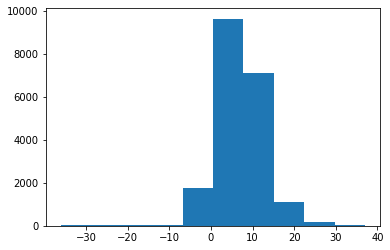

In [346]:
plt.hist(train['fund_return_3years'])

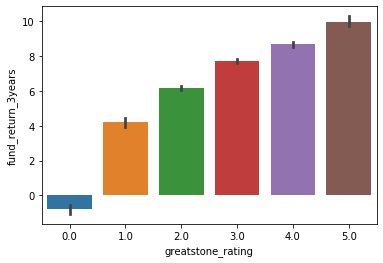

In [347]:
sns.barplot(x='greatstone_rating',y='fund_return_3years',data=train)

In [348]:
train['2018_return_fund'].describe()

count    19255.000000
mean        -6.681443
std          6.681714
min        -58.600000
25%        -10.480000
50%         -5.780000
75%         -1.630000
max         39.470000
Name: 2018_return_fund, dtype: float64

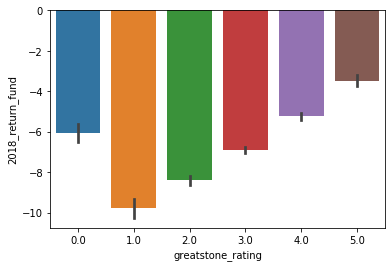

In [350]:
sns.barplot(x='greatstone_rating',y='2018_return_fund',data=train)

(array([1.0000e+00, 1.3000e+01, 3.2000e+01, 7.2300e+02, 4.7270e+03,
        1.0897e+04, 2.7900e+03, 5.9000e+01, 1.1000e+01, 2.0000e+00]),
 array([-58.6  , -48.793, -38.986, -29.179, -19.372,  -9.565,   0.242,
         10.049,  19.856,  29.663,  39.47 ]),
 <a list of 10 Patch objects>)

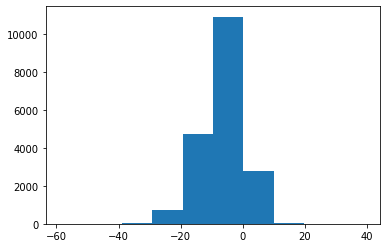

In [351]:
plt.hist(train['2018_return_fund'])

In [352]:
train['category_ratio_net_annual_expense'].describe()

count    20000.000000
mean         1.013129
std          0.330244
min          0.390000
25%          0.810000
50%          1.010000
75%          1.180000
max          2.600000
Name: category_ratio_net_annual_expense, dtype: float64

(array([2172., 3674., 4970., 6050., 2069.,  361.,  185.,  141.,  366.,
          12.]),
 array([0.39 , 0.611, 0.832, 1.053, 1.274, 1.495, 1.716, 1.937, 2.158,
        2.379, 2.6  ]),
 <a list of 10 Patch objects>)

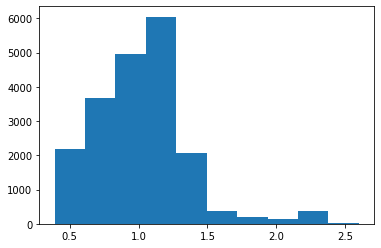

In [353]:
plt.hist(train['category_ratio_net_annual_expense'])

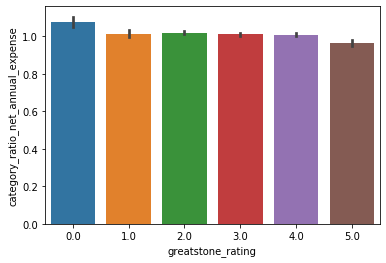

In [354]:
sns.barplot(x='greatstone_rating',y='category_ratio_net_annual_expense',data=train)

In [355]:
train['1_month_fund_return'].describe()

count    19907.000000
mean         0.959726
std          1.702168
min        -13.630000
25%          0.350000
50%          1.100000
75%          1.710000
max         15.290000
Name: 1_month_fund_return, dtype: float64

(array([1.0000e+00, 2.2000e+01, 7.3000e+01, 8.8400e+02, 6.8170e+03,
        1.1422e+04, 5.4900e+02, 8.9000e+01, 4.1000e+01, 9.0000e+00]),
 array([-13.63 , -10.738,  -7.846,  -4.954,  -2.062,   0.83 ,   3.722,
          6.614,   9.506,  12.398,  15.29 ]),
 <a list of 10 Patch objects>)

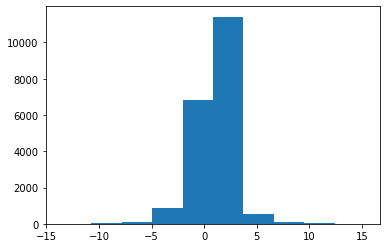

In [356]:
plt.hist(train['1_month_fund_return'])

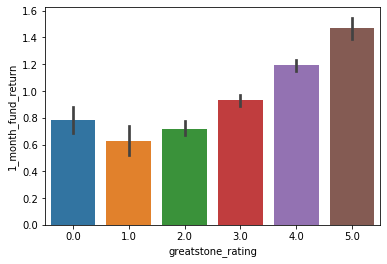

In [358]:
sns.barplot(x='greatstone_rating',y='1_month_fund_return',data=train)

In [359]:
train['bond_percentage_of_porfolio'].describe()

count    19905.000000
mean        30.841742
std         38.714804
min          0.000000
25%          0.000000
50%          2.420000
75%         64.060000
max        100.000000
Name: bond_percentage_of_porfolio, dtype: float64

(array([10700.,   842.,   739.,   939.,   744.,   704.,   477.,   380.,
          787.,  3593.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

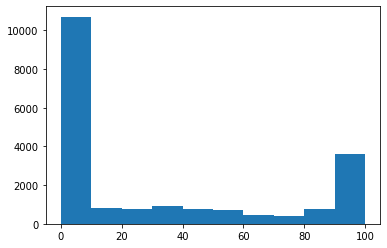

In [360]:
plt.hist(train['bond_percentage_of_porfolio'])

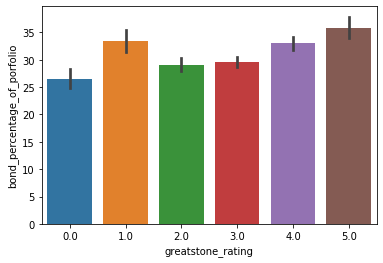

In [361]:
sns.barplot(x='greatstone_rating',y='bond_percentage_of_porfolio',data=train)

In [362]:
train['portfolio_preferred'].describe()

count    19905.000000
mean         0.299861
std          2.006662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010000
max         80.870000
Name: portfolio_preferred, dtype: float64

(array([1.9717e+04, 1.2800e+02, 3.0000e+01, 1.6000e+01, 3.0000e+00,
        5.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  8.087, 16.174, 24.261, 32.348, 40.435, 48.522, 56.609,
        64.696, 72.783, 80.87 ]),
 <a list of 10 Patch objects>)

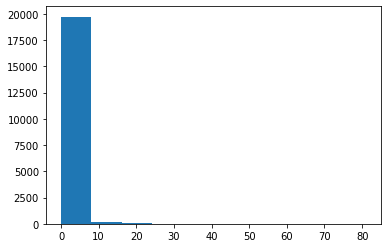

In [363]:
plt.hist(train['portfolio_preferred'])

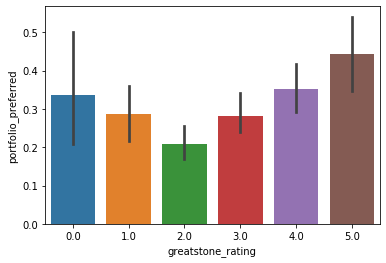

In [364]:
sns.barplot(x='greatstone_rating',y='portfolio_preferred',data=train)

In [365]:
train['10years_category_r_squared'].describe()

count    19918.000000
mean         0.732473
std          0.272967
min          0.000000
25%          0.710000
50%          0.840000
75%          0.920000
max          0.970000
Name: 10years_category_r_squared, dtype: float64

(array([1557.,  374.,  528.,    0.,  698.,  797.,  656., 3267., 3310.,
        8731.]),
 array([0.   , 0.097, 0.194, 0.291, 0.388, 0.485, 0.582, 0.679, 0.776,
        0.873, 0.97 ]),
 <a list of 10 Patch objects>)

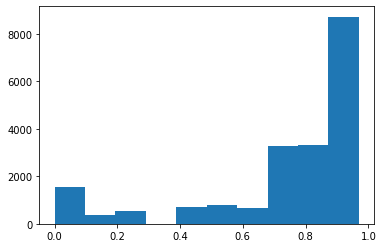

In [366]:
plt.hist(train['10years_category_r_squared'])

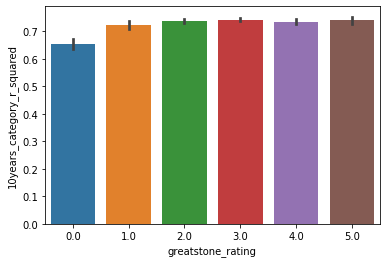

In [367]:
sns.barplot(x='greatstone_rating',y='10years_category_r_squared',data=train)

In [368]:
train['10yrs_sharpe_ratio_category'].describe()

count    19918.000000
mean         0.009496
std          0.002288
min         -0.010000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.010000
Name: 10yrs_sharpe_ratio_category, dtype: float64

In [369]:
train['10yrs_sharpe_ratio_category'].unique()

array([ 0.01,  0.  ,   nan, -0.01])

(array([   45.,     0.,     0.,     0.,     0.,   913.,     0.,     0.,
            0., 18960.]),
 array([-0.01 , -0.008, -0.006, -0.004, -0.002,  0.   ,  0.002,  0.004,
         0.006,  0.008,  0.01 ]),
 <a list of 10 Patch objects>)

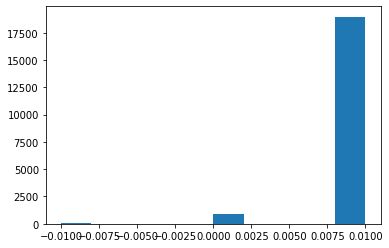

In [370]:
plt.hist(train['10yrs_sharpe_ratio_category'])

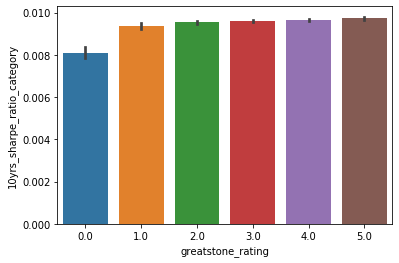

In [371]:
sns.barplot(x='greatstone_rating',y='10yrs_sharpe_ratio_category',data=train)

In [373]:
train['10_years_return_mean_annual_category'].describe()

count    19918.000000
mean         0.007663
std          0.004534
min         -0.020000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.020000
Name: 10_years_return_mean_annual_category, dtype: float64

In [374]:
train['10_years_return_mean_annual_category'].unique()

array([ 0.01,  0.  ,  0.02,   nan, -0.02])

(array([   45.,     0.,     0.,     0.,     0.,  4649.,     0., 15095.,
            0.,   129.]),
 array([-0.02 , -0.016, -0.012, -0.008, -0.004,  0.   ,  0.004,  0.008,
         0.012,  0.016,  0.02 ]),
 <a list of 10 Patch objects>)

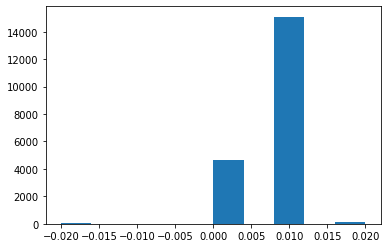

In [375]:
plt.hist(train['10_years_return_mean_annual_category'])

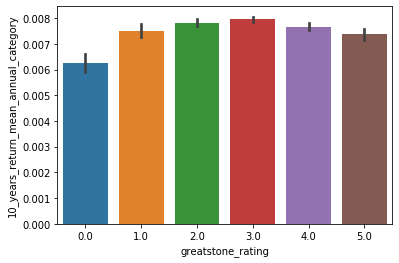

In [376]:
sns.barplot(x='greatstone_rating',y='10_years_return_mean_annual_category',data=train)

In [378]:
train['10yrs_treynor_ratio_category'].describe()

count    19918.000000
mean         0.136589
std          0.433144
min         -0.190000
25%          0.070000
50%          0.100000
75%          0.140000
max          4.680000
Name: 10yrs_treynor_ratio_category, dtype: float64

(array([19704.,    38.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   176.]),
 array([-0.19 ,  0.297,  0.784,  1.271,  1.758,  2.245,  2.732,  3.219,
         3.706,  4.193,  4.68 ]),
 <a list of 10 Patch objects>)

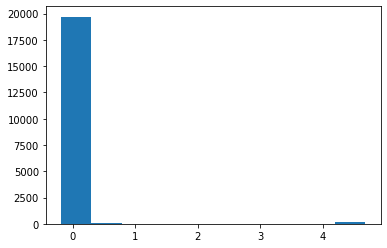

In [379]:
plt.hist(train['10yrs_treynor_ratio_category'])

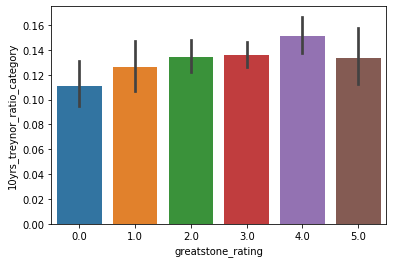

In [380]:
sns.barplot(x='greatstone_rating',y='10yrs_treynor_ratio_category',data=train)

In [381]:
train['10_years_return_fund'].describe()

count    19907.000000
mean         6.599764
std          6.547350
min        -38.560000
25%          0.000000
50%          5.850000
75%         12.380000
max         40.660000
Name: 10_years_return_fund, dtype: float64

(array([2.300e+01, 7.000e+00, 2.400e+01, 2.000e+01, 7.014e+03, 5.007e+03,
        6.937e+03, 8.570e+02, 1.200e+01, 6.000e+00]),
 array([-38.56 , -30.638, -22.716, -14.794,  -6.872,   1.05 ,   8.972,
         16.894,  24.816,  32.738,  40.66 ]),
 <a list of 10 Patch objects>)

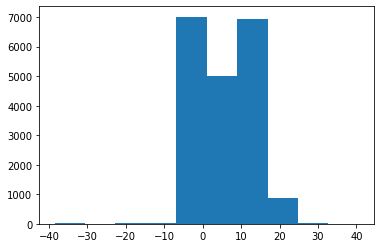

In [383]:
plt.hist(train['10_years_return_fund'])

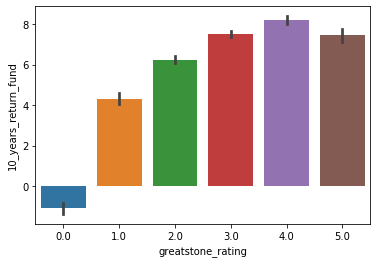

In [384]:
sns.barplot(x='greatstone_rating',y='10_years_return_fund',data=train)

In [385]:
train['10_years_alpha_category'].describe()

count    19918.000000
mean         0.000966
std          0.027752
min         -0.110000
25%         -0.020000
50%         -0.000000
75%          0.010000
max          0.100000
Name: 10_years_alpha_category, dtype: float64

(array([  64.,    0.,  142., 1653., 7990., 6124.,  962., 1678.,  739.,
         566.]),
 array([-0.11 , -0.089, -0.068, -0.047, -0.026, -0.005,  0.016,  0.037,
         0.058,  0.079,  0.1  ]),
 <a list of 10 Patch objects>)

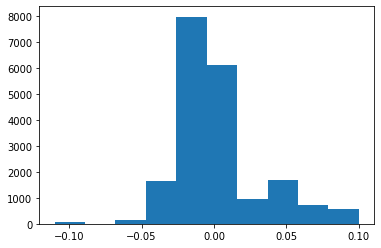

In [386]:
plt.hist(train['10_years_alpha_category'])

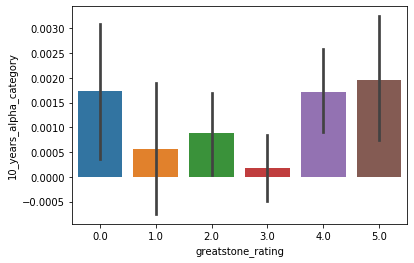

In [387]:
sns.barplot(x='greatstone_rating',y='10_years_alpha_category',data=train)

In [388]:
train['10_years_beta_category'].describe()

count    19918.000000
mean         0.009066
std          0.005417
min         -0.020000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.120000
Name: 10_years_beta_category, dtype: float64

(array([   45.,  2495., 17338.,    19.,     0.,     0.,     0.,     0.,
            0.,    21.]),
 array([-0.02 , -0.006,  0.008,  0.022,  0.036,  0.05 ,  0.064,  0.078,
         0.092,  0.106,  0.12 ]),
 <a list of 10 Patch objects>)

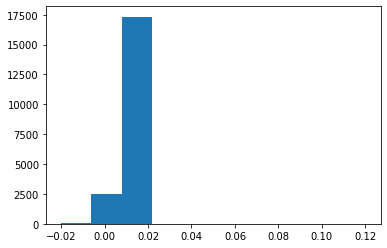

In [389]:
plt.hist(train['10_years_beta_category'])

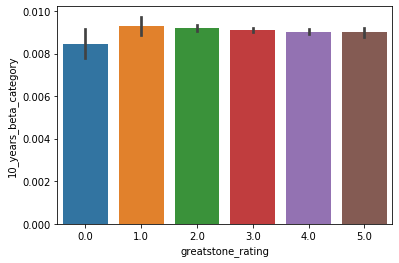

In [390]:
sns.barplot(x='greatstone_rating',y='10_years_beta_category',data=train)

In [391]:
train['10years_category_std'].describe()

count    19918.000000
mean         0.109273
std          0.055199
min          0.000000
25%          0.060000
50%          0.120000
75%          0.150000
max          0.340000
Name: 10years_category_std, dtype: float64

(array([2181., 2921., 3844., 3494., 4492., 2685.,  126.,  134.,    0.,
          41.]),
 array([0.   , 0.034, 0.068, 0.102, 0.136, 0.17 , 0.204, 0.238, 0.272,
        0.306, 0.34 ]),
 <a list of 10 Patch objects>)

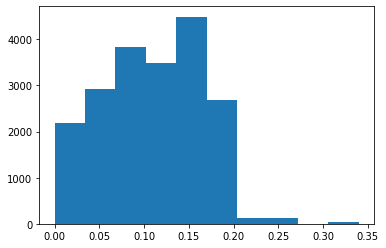

In [392]:
plt.hist(train['10years_category_std'])

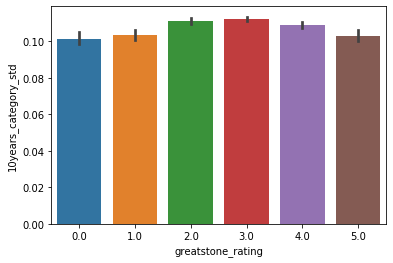

In [393]:
sns.barplot(x='greatstone_rating',y='10years_category_std',data=train)

In [394]:
train['10_years_return_category'].describe()

count    19907.000000
mean         9.657428
std          4.951263
min        -24.990000
25%          6.440000
50%          9.970000
75%         14.120000
max         18.720000
Name: 10_years_return_category, dtype: float64

(array([  45.,    0.,    0.,    0.,    0.,  635., 3995., 5392., 5183.,
        4657.]),
 array([-24.99 , -20.619, -16.248, -11.877,  -7.506,  -3.135,   1.236,
          5.607,   9.978,  14.349,  18.72 ]),
 <a list of 10 Patch objects>)

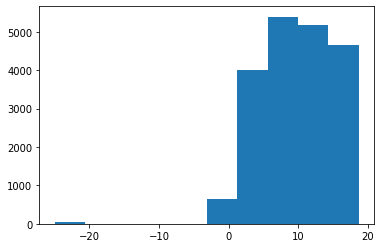

In [395]:
plt.hist(train['10_years_return_category'])

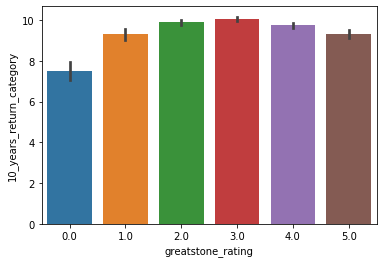

In [396]:
sns.barplot(x='greatstone_rating',y='10_years_return_category',data=train)

In [397]:
train['3yrs_treynor_ratio_fund'].describe()

count     18683
unique     4595
top         5.5
freq         32
Name: 3yrs_treynor_ratio_fund, dtype: object

In [19]:
train['3yrs_treynor_ratio_fund']=train['3yrs_treynor_ratio_fund'].apply(lambda x: re.sub(",","",str(x)))
train['3yrs_treynor_ratio_fund']=train['3yrs_treynor_ratio_fund'].astype('float64')

In [401]:
train['3yrs_treynor_ratio_fund'].describe()

count    18683.000000
mean         6.791413
std         38.133463
min      -4145.820000
25%          3.070000
50%          6.140000
75%          9.730000
max       1786.030000
Name: 3yrs_treynor_ratio_fund, dtype: float64

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0088e+04, 8.5900e+03, 3.0000e+00, 1.0000e+00]),
 array([-4145.82 , -3552.635, -2959.45 , -2366.265, -1773.08 , -1179.895,
         -586.71 ,     6.475,   599.66 ,  1192.845,  1786.03 ]),
 <a list of 10 Patch objects>)

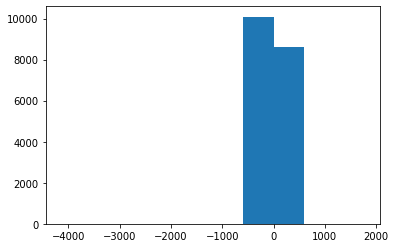

In [402]:
plt.hist(train['3yrs_treynor_ratio_fund'])

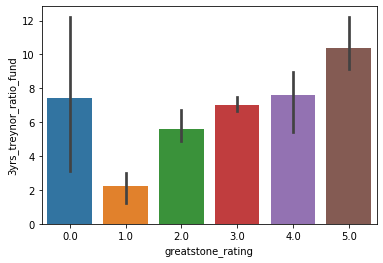

In [403]:
sns.barplot(x='greatstone_rating',y='3yrs_treynor_ratio_fund',data=train)

In [404]:
train['3_years_alpha_fund'].describe()

count    18683.000000
mean        -0.592177
std          3.369690
min        -35.250000
25%         -2.120000
50%         -0.580000
75%          0.860000
max         19.150000
Name: 3_years_alpha_fund, dtype: float64

(array([4.0000e+00, 5.0000e+00, 5.0000e+00, 3.2000e+01, 3.1600e+02,
        3.4630e+03, 1.2459e+04, 2.2070e+03, 1.7700e+02, 1.5000e+01]),
 array([-35.25, -29.81, -24.37, -18.93, -13.49,  -8.05,  -2.61,   2.83,
          8.27,  13.71,  19.15]),
 <a list of 10 Patch objects>)

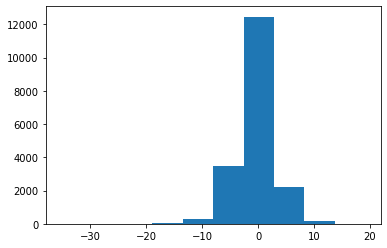

In [405]:
plt.hist(train['3_years_alpha_fund'])

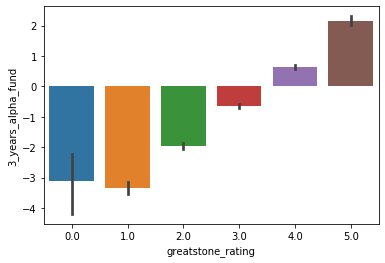

In [406]:
sns.barplot(x='greatstone_rating',y='3_years_alpha_fund',data=train)

In [407]:
train['3years_category_std'].describe()

count    19918.000000
mean         0.088756
std          0.047805
min          0.000000
25%          0.040000
50%          0.090000
75%          0.130000
max          0.330000
Name: 3years_category_std, dtype: float64

(array([3613., 3367., 3126., 7262., 2174.,  212.,   45.,   64.,   14.,
          41.]),
 array([0.   , 0.033, 0.066, 0.099, 0.132, 0.165, 0.198, 0.231, 0.264,
        0.297, 0.33 ]),
 <a list of 10 Patch objects>)

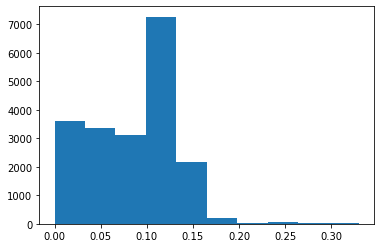

In [408]:
plt.hist(train['3years_category_std'])

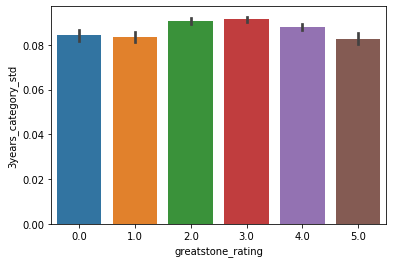

In [409]:
sns.barplot(x='greatstone_rating',y='3years_category_std',data=train)

In [410]:
train['3yrs_sharpe_ratio_fund'].describe()

count    18683.000000
mean         0.681725
std          0.458601
min         -2.850000
25%          0.440000
50%          0.740000
75%          0.970000
max          4.160000
Name: 3yrs_sharpe_ratio_fund, dtype: float64

(array([5.000e+00, 3.500e+01, 1.440e+02, 8.480e+02, 6.988e+03, 9.981e+03,
        5.990e+02, 6.700e+01, 1.300e+01, 3.000e+00]),
 array([-2.85 , -2.149, -1.448, -0.747, -0.046,  0.655,  1.356,  2.057,
         2.758,  3.459,  4.16 ]),
 <a list of 10 Patch objects>)

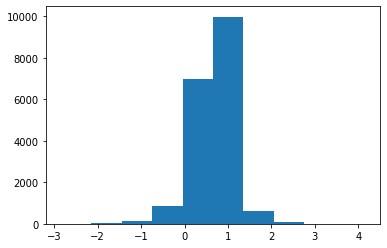

In [411]:
plt.hist(train['3yrs_sharpe_ratio_fund'])

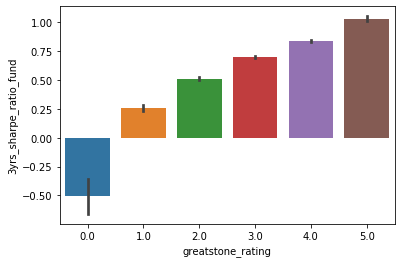

In [412]:
sns.barplot(x='greatstone_rating',y='3yrs_sharpe_ratio_fund',data=train)

In [413]:
train['3yrs_treynor_ratio_category'].describe()

count    19918.000000
mean         0.069516
std          0.068523
min         -0.760000
25%          0.050000
50%          0.060000
75%          0.100000
max          0.300000
Name: 3yrs_treynor_ratio_category, dtype: float64

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7600e+02,
        4.7000e+01, 1.9900e+02, 1.3293e+04, 5.4080e+03, 7.9300e+02]),
 array([-0.76 , -0.654, -0.548, -0.442, -0.336, -0.23 , -0.124, -0.018,
         0.088,  0.194,  0.3  ]),
 <a list of 10 Patch objects>)

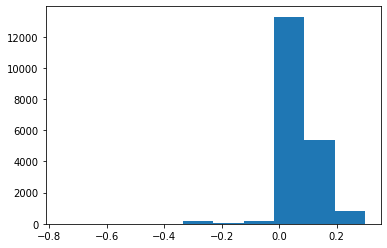

In [414]:
plt.hist(train['3yrs_treynor_ratio_category'])

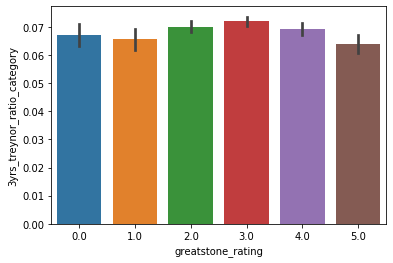

In [415]:
sns.barplot(x='greatstone_rating',y='3yrs_treynor_ratio_category',data=train)

In [416]:
train['3_years_return_mean_annual_fund'].describe()

count    18683.000000
mean         0.634665
std          0.435896
min         -3.190000
25%          0.330000
50%          0.620000
75%          0.890000
max          2.900000
Name: 3_years_return_mean_annual_fund, dtype: float64

(array([  12.,   18.,   12.,   32.,  140., 6348., 9615., 2222.,  265.,
          19.]),
 array([-3.19 , -2.581, -1.972, -1.363, -0.754, -0.145,  0.464,  1.073,
         1.682,  2.291,  2.9  ]),
 <a list of 10 Patch objects>)

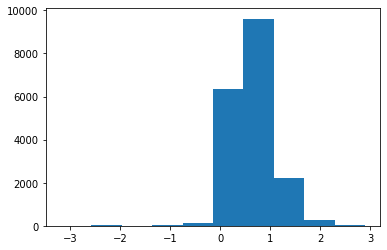

In [417]:
plt.hist(train['3_years_return_mean_annual_fund'])

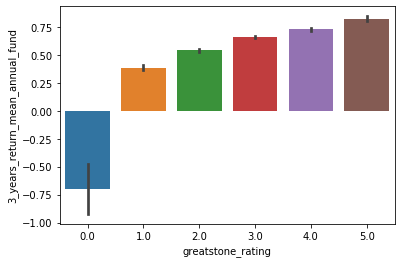

In [418]:
sns.barplot(x='greatstone_rating',y='3_years_return_mean_annual_fund',data=train)

In [419]:
train['fund_beta_3years'].describe()

count    18683.00000
mean         0.90841
std          0.65882
min        -39.66000
25%          0.77000
50%          0.98000
75%          1.14000
max         22.57000
Name: fund_beta_3years, dtype: float64

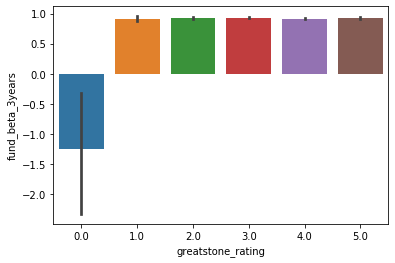

In [421]:
sns.barplot(x='greatstone_rating',y='fund_beta_3years',data=train)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        2.7000e+01, 1.8639e+04, 1.0000e+01, 2.0000e+00, 1.0000e+00]),
 array([-39.66 , -33.437, -27.214, -20.991, -14.768,  -8.545,  -2.322,
          3.901,  10.124,  16.347,  22.57 ]),
 <a list of 10 Patch objects>)

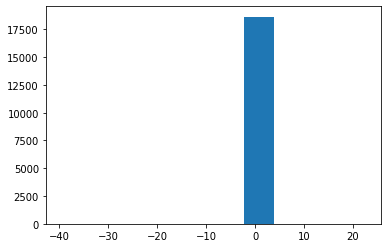

In [423]:
plt.hist(train['fund_beta_3years'])

In [20]:
train.drop(columns=['fund_return_3years_y'],inplace=True)

In [426]:
train['3years_fund_r_squared'].describe()

count    18683.000000
mean        72.681140
std         27.114677
min          0.000000
25%         64.405000
50%         81.990000
75%         92.740000
max        100.000000
Name: 3years_fund_r_squared, dtype: float64

(array([1304.,  366.,  373.,  540.,  574.,  935., 1805., 2703., 4064.,
        6019.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

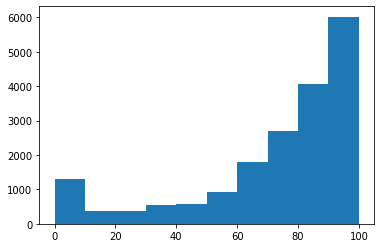

In [427]:
plt.hist(train['3years_fund_r_squared'])

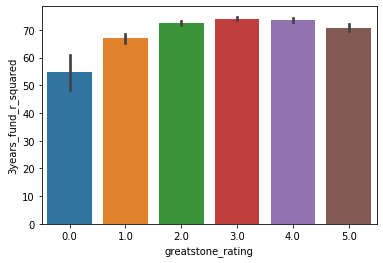

In [428]:
sns.barplot(x='greatstone_rating',y='3years_fund_r_squared',data=train)

In [429]:
train['3years_fund_std'].describe()

count    18683.000000
mean         9.043514
std          5.113828
min          0.180000
25%          4.290000
50%          9.650000
75%         12.380000
max         50.440000
Name: 3years_fund_std, dtype: float64

(array([5.606e+03, 4.548e+03, 6.772e+03, 1.456e+03, 1.700e+02, 5.800e+01,
        5.900e+01, 8.000e+00, 1.000e+00, 5.000e+00]),
 array([ 0.18 ,  5.206, 10.232, 15.258, 20.284, 25.31 , 30.336, 35.362,
        40.388, 45.414, 50.44 ]),
 <a list of 10 Patch objects>)

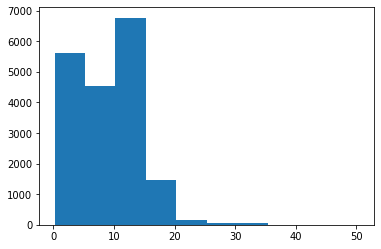

In [430]:
plt.hist(train['3years_fund_std'])

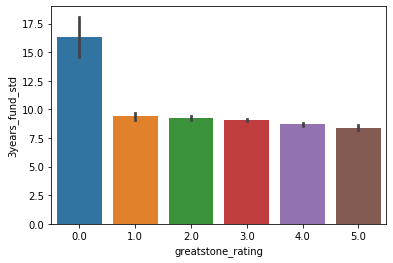

In [431]:
sns.barplot(x='greatstone_rating',y='3years_fund_std',data=train)

In [432]:
train['category_beta_3years'].describe()

count    19918.000000
mean         0.008786
std          0.003658
min         -0.010000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.030000
Name: category_beta_3years, dtype: float64

(array([   45.,     0.,  2534.,     0.,     0., 17152.,     0.,   168.,
            0.,    19.]),
 array([-0.01 , -0.006, -0.002,  0.002,  0.006,  0.01 ,  0.014,  0.018,
         0.022,  0.026,  0.03 ]),
 <a list of 10 Patch objects>)

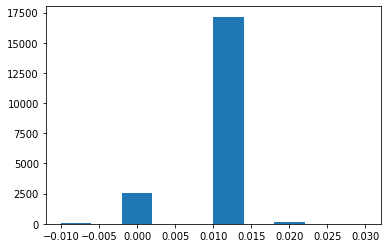

In [433]:
plt.hist(train['category_beta_3years'])

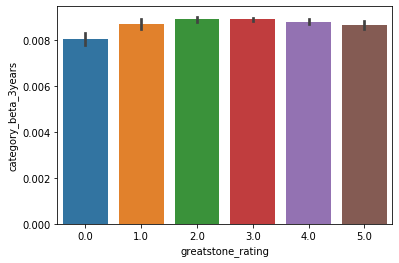

In [434]:
sns.barplot(x='greatstone_rating',y='category_beta_3years',data=train)

In [435]:
train['3_years_alpha_category'].describe()

count    19918.000000
mean        -0.004693
std          0.023474
min         -0.120000
25%         -0.010000
50%         -0.010000
75%         -0.000000
max          0.110000
Name: 3_years_alpha_category, dtype: float64

(array([  64.,    0.,  344., 1720., 8572., 6402., 2094.,  579.,  129.,
          14.]),
 array([-0.12 , -0.097, -0.074, -0.051, -0.028, -0.005,  0.018,  0.041,
         0.064,  0.087,  0.11 ]),
 <a list of 10 Patch objects>)

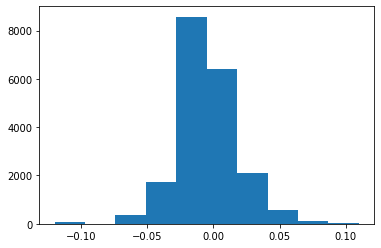

In [436]:
plt.hist(train['3_years_alpha_category'])

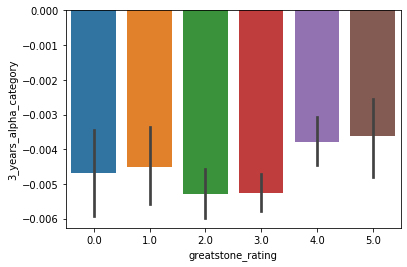

In [437]:
sns.barplot(x='greatstone_rating',y='3_years_alpha_category',data=train)

In [438]:
train['3_years_return_mean_annual_category'].describe()

count    19918.000000
mean         0.006497
std          0.005055
min         -0.020000
25%          0.000000
50%          0.010000
75%          0.010000
max          0.020000
Name: 3_years_return_mean_annual_category, dtype: float64

(array([   45.,     0.,     0.,     0.,     0.,  6986.,     0., 12744.,
            0.,   143.]),
 array([-0.02 , -0.016, -0.012, -0.008, -0.004,  0.   ,  0.004,  0.008,
         0.012,  0.016,  0.02 ]),
 <a list of 10 Patch objects>)

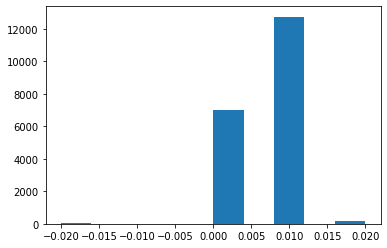

In [439]:
plt.hist(train['3_years_return_mean_annual_category'])

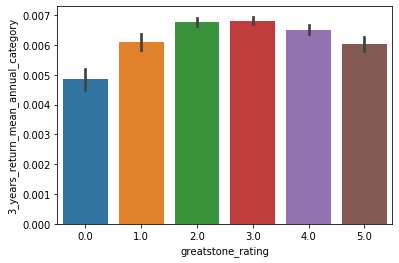

In [440]:
sns.barplot(x='greatstone_rating',y='3_years_return_mean_annual_category',data=train)

In [441]:
train['3yrs_sharpe_ratio_category'].describe()

count    19918.000000
mean         0.007139
std          0.004648
min         -0.010000
25%          0.000000
50%          0.010000
75%          0.010000
max          0.010000
Name: 3yrs_sharpe_ratio_category, dtype: float64

(array([  117.,     0.,     0.,     0.,     0.,  5465.,     0.,     0.,
            0., 14336.]),
 array([-0.01 , -0.008, -0.006, -0.004, -0.002,  0.   ,  0.002,  0.004,
         0.006,  0.008,  0.01 ]),
 <a list of 10 Patch objects>)

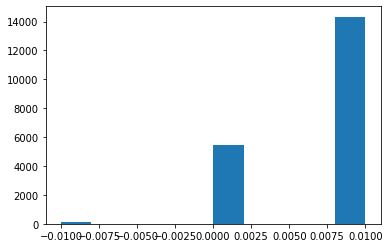

In [442]:
plt.hist(train['3yrs_sharpe_ratio_category'])

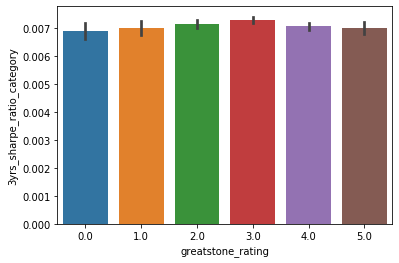

In [443]:
sns.barplot(x='greatstone_rating',y='3yrs_sharpe_ratio_category',data=train)

In [444]:
train['3years_category_r_squared'].describe()

count    19918.000000
mean         0.717347
std          0.250218
min          0.000000
25%          0.630000
50%          0.810000
75%          0.890000
max          0.970000
Name: 3years_category_r_squared, dtype: float64

(array([1084.,  510.,  492.,  254.,  535., 1006., 1934., 2832., 4627.,
        6644.]),
 array([0.   , 0.097, 0.194, 0.291, 0.388, 0.485, 0.582, 0.679, 0.776,
        0.873, 0.97 ]),
 <a list of 10 Patch objects>)

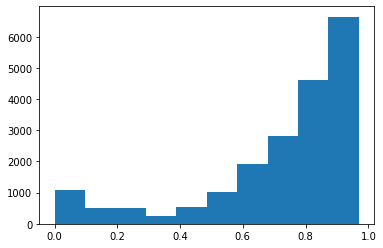

In [445]:
plt.hist(train['3years_category_r_squared'])

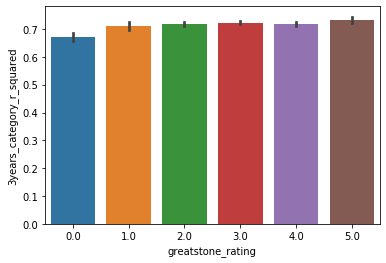

In [447]:
sns.barplot(x='greatstone_rating',y='3years_category_r_squared',data=train)

In [448]:
train['3_years_return_category'].describe()

count    19907.000000
mean         7.444975
std          4.456883
min        -19.790000
25%          4.260000
50%          7.440000
75%         10.010000
max         21.780000
Name: 3_years_return_category, dtype: float64

(array([  45.,    0.,    0.,    0.,  677., 5377., 6829., 4814., 2036.,
         129.]),
 array([-19.79 , -15.633, -11.476,  -7.319,  -3.162,   0.995,   5.152,
          9.309,  13.466,  17.623,  21.78 ]),
 <a list of 10 Patch objects>)

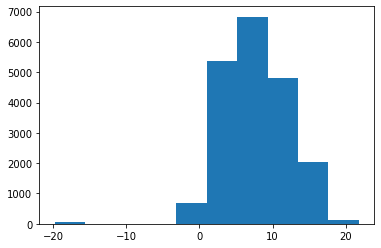

In [449]:
plt.hist(train['3_years_return_category'])

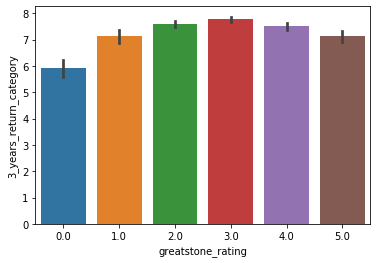

In [450]:
sns.barplot(x='greatstone_rating',y='3_years_return_category',data=train)

In [451]:
train['category_r_squared_5years'].describe()

count    19918.000000
mean         0.713687
std          0.259414
min          0.000000
25%          0.640000
50%          0.830000
75%          0.890000
max          0.970000
Name: category_r_squared_5years, dtype: float64

(array([1084.,  723.,  445.,  258.,  433., 1393., 1912., 1583., 5802.,
        6285.]),
 array([0.   , 0.097, 0.194, 0.291, 0.388, 0.485, 0.582, 0.679, 0.776,
        0.873, 0.97 ]),
 <a list of 10 Patch objects>)

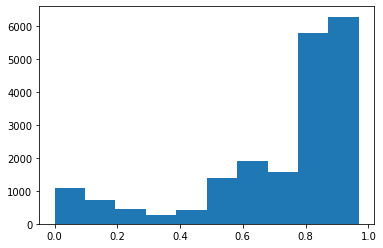

In [452]:
plt.hist(train['category_r_squared_5years'])

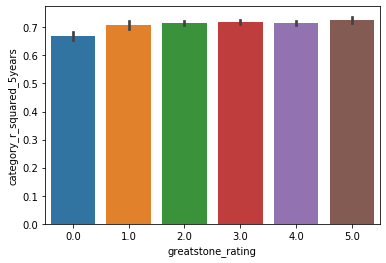

In [453]:
sns.barplot(x='greatstone_rating',y='category_r_squared_5years',data=train)

In [454]:
train['5yrs_sharpe_ratio_category'].describe()

count    19918.000000
mean         0.005958
std          0.005047
min         -0.010000
25%          0.000000
50%          0.010000
75%          0.010000
max          0.010000
Name: 5yrs_sharpe_ratio_category, dtype: float64

(array([  138.,     0.,     0.,     0.,     0.,  7774.,     0.,     0.,
            0., 12006.]),
 array([-0.01 , -0.008, -0.006, -0.004, -0.002,  0.   ,  0.002,  0.004,
         0.006,  0.008,  0.01 ]),
 <a list of 10 Patch objects>)

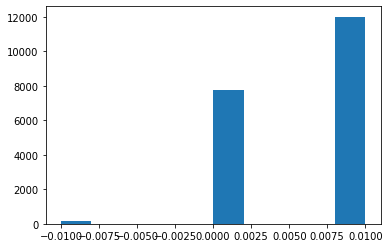

In [455]:
plt.hist(train['5yrs_sharpe_ratio_category'])

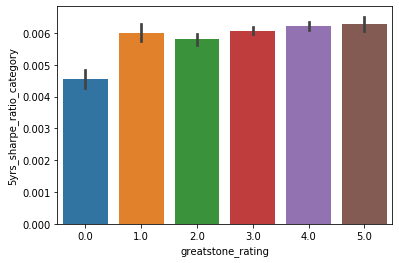

In [456]:
sns.barplot(x='greatstone_rating',y='5yrs_sharpe_ratio_category',data=train)

In [457]:
train['5_years_return_mean_annual_category'].describe()

count    19918.000000
mean         0.003877
std          0.005076
min         -0.010000
25%          0.000000
50%          0.000000
75%          0.010000
max          0.010000
Name: 5_years_return_mean_annual_category, dtype: float64

(array([  202.,     0.,     0.,     0.,     0., 11792.,     0.,     0.,
            0.,  7924.]),
 array([-0.01 , -0.008, -0.006, -0.004, -0.002,  0.   ,  0.002,  0.004,
         0.006,  0.008,  0.01 ]),
 <a list of 10 Patch objects>)

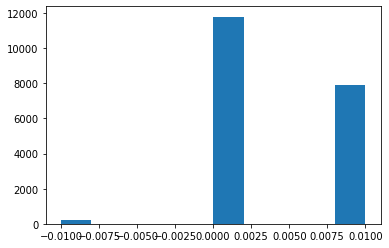

In [458]:
plt.hist(train['5_years_return_mean_annual_category'])

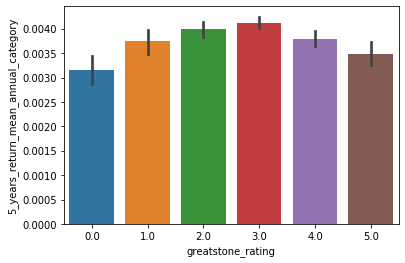

In [459]:
sns.barplot(x='greatstone_rating',y='5_years_return_mean_annual_category',data=train)

In [460]:
train['5yrs_treynor_ratio_category'].describe()

count    19918.000000
mean         0.041142
std          0.044340
min         -0.160000
25%          0.020000
50%          0.040000
75%          0.070000
max          0.320000
Name: 5yrs_treynor_ratio_category, dtype: float64

(array([ 320.,  359.,  200., 7391., 8474., 3089.,    0.,    0.,   38.,
          47.]),
 array([-0.16 , -0.112, -0.064, -0.016,  0.032,  0.08 ,  0.128,  0.176,
         0.224,  0.272,  0.32 ]),
 <a list of 10 Patch objects>)

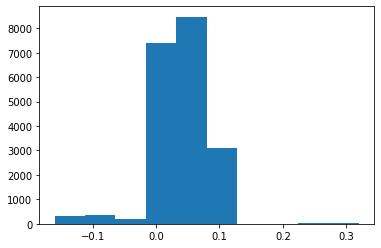

In [461]:
plt.hist(train['5yrs_treynor_ratio_category'])

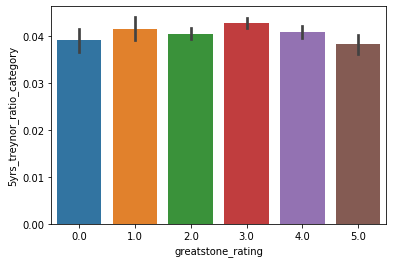

In [462]:
sns.barplot(x='greatstone_rating',y='5yrs_treynor_ratio_category',data=train)

In [463]:
train['5_years_return_fund'].describe()

count    19907.000000
mean         4.098297
std          4.197101
min        -32.750000
25%          1.210000
50%          3.740000
75%          6.510000
max         29.290000
Name: 5_years_return_fund, dtype: float64

(array([1.0000e+01, 2.2000e+01, 2.3000e+01, 1.1000e+02, 3.3700e+02,
        1.0977e+04, 7.2130e+03, 1.1370e+03, 7.0000e+01, 8.0000e+00]),
 array([-32.75 , -26.546, -20.342, -14.138,  -7.934,  -1.73 ,   4.474,
         10.678,  16.882,  23.086,  29.29 ]),
 <a list of 10 Patch objects>)

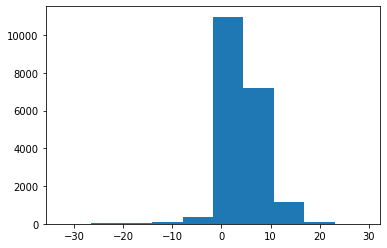

In [464]:
plt.hist(train['5_years_return_fund'])

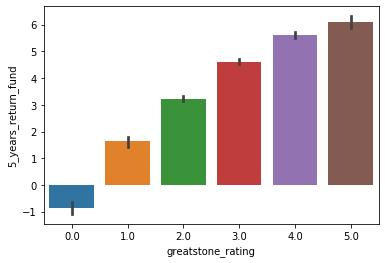

In [465]:
sns.barplot(x='greatstone_rating',y='5_years_return_fund',data=train)

In [466]:
train['5_years_alpha_category'].describe()

count    19918.000000
mean        -0.008227
std          0.026408
min         -0.180000
25%         -0.020000
50%         -0.000000
75%          0.000000
max          0.080000
Name: 5_years_alpha_category, dtype: float64

(array([   64.,     0.,    77.,    82.,  1192.,  2815., 11620.,  2655.,
         1193.,   220.]),
 array([-0.18 , -0.154, -0.128, -0.102, -0.076, -0.05 , -0.024,  0.002,
         0.028,  0.054,  0.08 ]),
 <a list of 10 Patch objects>)

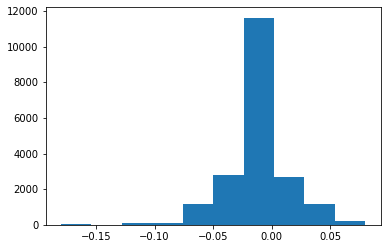

In [467]:
plt.hist(train['5_years_alpha_category'])

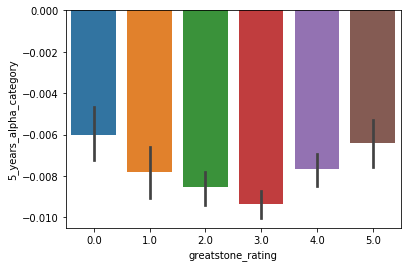

In [469]:
sns.barplot(x='greatstone_rating',y='5_years_alpha_category',data=train)

In [470]:
train['5_years_beta_category'].describe()

count    19918.00000
mean         0.00861
std          0.00400
min         -0.02000
25%          0.01000
50%          0.01000
75%          0.01000
max          0.03000
Name: 5_years_beta_category, dtype: float64

(array([   45.,     0.,     0.,     0.,  2860.,     0., 16826.,     0.,
          147.,    40.]),
 array([-0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,
         0.02 ,  0.025,  0.03 ]),
 <a list of 10 Patch objects>)

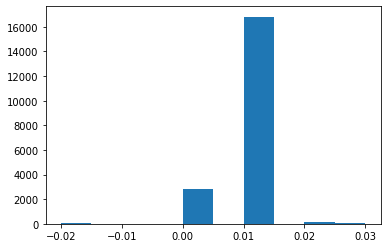

In [471]:
plt.hist(train['5_years_beta_category'])

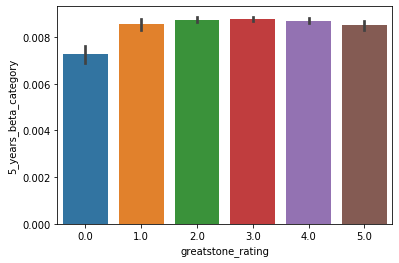

In [472]:
sns.barplot(x='greatstone_rating',y='5_years_beta_category',data=train)

In [473]:
train['5years_category_std'].describe()

count    19918.000000
mean         0.093062
std          0.049491
min          0.000000
25%          0.050000
50%          0.100000
75%          0.130000
max          0.360000
Name: 5years_category_std, dtype: float64

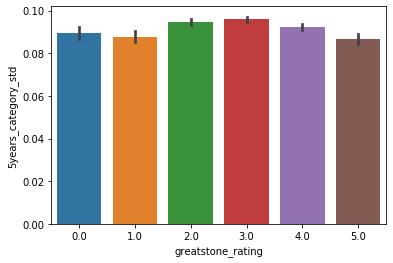

In [475]:
sns.barplot(x='greatstone_rating',y='5years_category_std',data=train)

(array([3707., 3398., 3070., 7084., 2283.,  212.,   45.,   78.,    0.,
          41.]),
 array([0.   , 0.036, 0.072, 0.108, 0.144, 0.18 , 0.216, 0.252, 0.288,
        0.324, 0.36 ]),
 <a list of 10 Patch objects>)

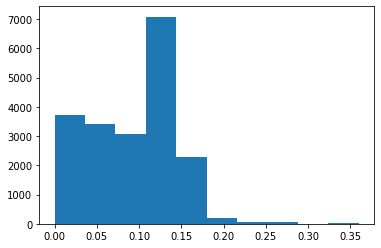

In [476]:
plt.hist(train['5years_category_std'])

In [477]:
train['5_years_return_category'].describe()

count    19907.000000
mean         4.748147
std          3.421631
min        -17.000000
25%          2.610000
50%          4.160000
75%          6.410000
max         15.260000
Name: 5_years_return_category, dtype: float64

(array([  45.,   62.,   94.,   77.,  125., 3241., 8413., 4888., 2833.,
         129.]),
 array([-17.   , -13.774, -10.548,  -7.322,  -4.096,  -0.87 ,   2.356,
          5.582,   8.808,  12.034,  15.26 ]),
 <a list of 10 Patch objects>)

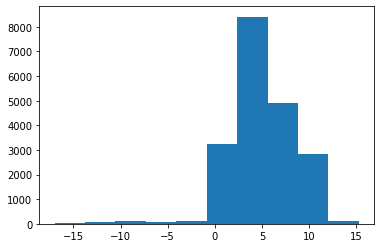

In [478]:
plt.hist(train['5_years_return_category'])

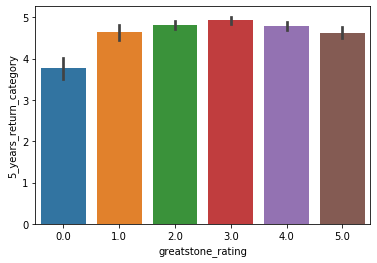

In [479]:
sns.barplot(x='greatstone_rating',y='5_years_return_category',data=train)

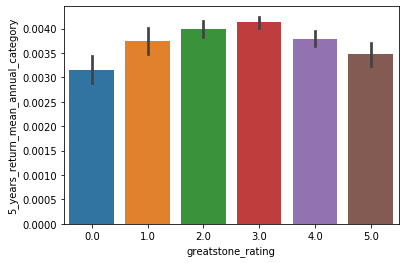

In [480]:
sns.barplot(x='greatstone_rating',y='5_years_return_mean_annual_category',data=train)

In [21]:
train.drop(columns=['portfolio_communication_allocation',
                    'category','investment_class','fund_size',
                    '10_years_beta_category',
                    '3yrs_sharpe_ratio_category','3years_category_r_squared',
                    'category_r_squared_5years'], inplace=True)

In [5]:
#train=train[train['greatstone_rating']!=0]
train['greatstone_rating']=train['greatstone_rating'].astype('category')

In [22]:
train.shape

(20000, 82)

In [23]:
train.to_csv('data_af_uni.csv')